In [1]:
import pandas as pd # Data Manipulation
import numpy as np # Pre-requisite for Pandas
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Plotting
from sklearn.preprocessing import LabelEncoder # Label Encoder for Prediction (Not used)
from sklearn.model_selection import train_test_split # Training model for Prediction (Original idea was Random Forest)
from catboost import CatBoostRegressor # Open Source Gradient Boosting Algorithm for Prediction (Used)

In [2]:
df = pd.read_excel("DataMini.xlsx") # Read the excel sheet into a dataframe

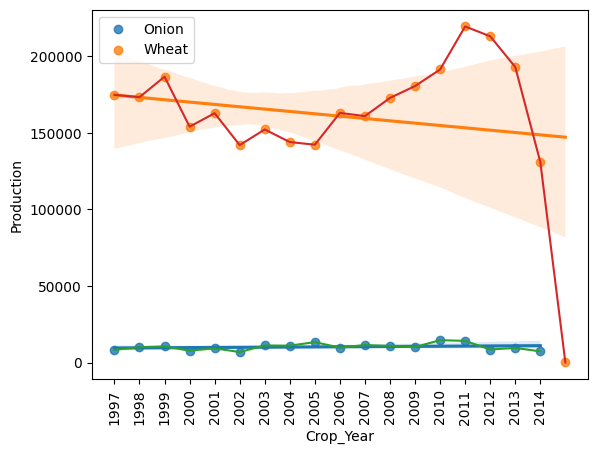

In [3]:
# Production should be in Lakh Tonnes and Area should be in Million Hectares
df = df[df.Production != '='] # Remove any row containing '='
df.Production = df.Production.astype(float) # Parse the 'Production' row as a float

onion_data = df[df['Crop'] == 'Onion'] # Find the data rows containing 'Onion' in 'Crop' column
wheat_data = df[df['Crop'] == 'Wheat'] # Find the data rows containing 'Wheat' in 'Crop' column

onion_prod = onion_data.groupby("Crop_Year").mean()['Production'] # Mean Onion Production per year
wheat_prod = wheat_data.groupby("Crop_Year").mean()['Production'] # Mean Wheat Production per year

years_onion_prod = onion_prod.index # 'Years' index for Onion
years_onion_prod = pd.Series(years_onion_prod) # Make the 'Years' into a 1D date series label
years_wheat_prod = wheat_prod.index # 'Years' index for Wheat
years_wheat_prod = pd.Series(years_wheat_prod) # Make the 'Years' into a 1D date series label

onion_prod_df = pd.DataFrame(data=onion_prod,index=years_onion_prod) # Onion Production Dataframe (Years, Production)
wheat_prod_df = pd.DataFrame(data=wheat_prod,index=years_wheat_prod) # Wheat Production Dataframe (Years, Production)

sns.regplot(data=onion_prod_df,x=onion_prod_df.index,y=onion_prod_df.Production, label='Onion'); # Blue Color Onion Regression + Scatter Plot
sns.regplot(data=wheat_prod_df,x=wheat_prod_df.index,y=wheat_prod_df.Production, label='Wheat'); # Orange Color Wheat Regression + Scatter Plot

sns.lineplot(data=onion_prod_df,x=onion_prod_df.index,y=onion_prod_df.Production); # Blue Color Onion Line Plot
sns.lineplot(data=wheat_prod_df,x=wheat_prod_df.index,y=wheat_prod_df.Production); # Orange Color Wheat Line Plot

plt.gca().set_xticks(onion_prod_df.index); # Use original 'Years' from the onion production dataframe
# plt.gca().set_xticks(wheat_prod_df.index); # Use original data 'Years' from the wheat production dataframe

plt.xticks(rotation=90); # Rotate the X label by 90 degree
# Very erratic data for wheat, somehow also very few 2015 data as well, causing the unmarked drop.

In [4]:
onion_states = pd.DataFrame(onion_data.State_Name.unique(), columns=['State Name']) # States growing Onions
wheat_states = pd.DataFrame(wheat_data.State_Name.unique(), columns=['State Name']) # States growing Wheat

In [5]:
onion_states # Print Onion growing states

State Name
0          Maharashtra
1              Gujarat
2            Karnataka
3       Andhra Pradesh
4            Rajasthan
5          Uttarakhand
6       Madhya Pradesh
7           Tamil Nadu
8               Odisha
9           Telangana 
10       Uttar Pradesh
11             Haryana
12               Bihar
13        Chhattisgarh
14               Assam
15             Manipur
16           Jharkhand
17    Himachal Pradesh
18  Jammu and Kashmir 
19          Puducherry
20          Chandigarh

In [6]:
wheat_states # Print Wheat Growing States

State Name
0                   Punjab
1            Uttar Pradesh
2                  Haryana
3           Madhya Pradesh
4                Rajasthan
5                  Gujarat
6              Maharashtra
7                    Bihar
8              West Bengal
9              Uttarakhand
10      Jammu and Kashmir 
11        Himachal Pradesh
12               Karnataka
13            Chhattisgarh
14               Jharkhand
15                   Assam
16              Telangana 
17               Meghalaya
18                  Odisha
19                  Sikkim
20       Arunachal Pradesh
21                Nagaland
22          Andhra Pradesh
23              Chandigarh
24  Dadra and Nagar Haveli
25                 Tripura
26              Tamil Nadu
27                 Mizoram
28                  Kerala

In [7]:
def dataCalc(df): # Function for data calculation
    print("Mean : ", df.Production.mean())
    print("Median : ", df.Production.median())
    print("Variance : ", df.Production.var(ddof=0)) 
    print("Standard Deviation : ", df.Production.std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", df.Production.mad())

In [8]:
dataCalc(onion_data) # Data Calculation for entire onion production of India
print("")
dataCalc(wheat_data) # Data Calculation for entire wheat production of India

Mean :  10374.14793814433
Median :  1728.5
Variance :  1833503088.451449
Standard Deviation :  42819.42419570176
Average Deviation / Mean Absolute Deviation :  13628.409175612003

Mean :  169183.25168824574
Median :  59535.5
Variance :  63212009544.32636
Standard Deviation :  251419.98636609295
Average Deviation / Mean Absolute Deviation :  177999.7041373585


In [9]:
wheat_n_onion_df = pd.concat([wheat_data,onion_data]) # Merge the Onion and Wheat Data into one Dataframe

In [10]:
x = wheat_n_onion_df.drop(['Production'], axis=1) # Drop the Production column and store in x
y = wheat_n_onion_df.Production # Store the Production column in y
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Training Data
cat = CatBoostRegressor() # Intialize catboost regressor
cat.fit(x_train,y_train,cat_features=['State_Name','District_Name','Crop_Year','Season','Crop']); # Training

Learning rate set to 0.060541
0:	learn: 188075.0038210	total: 178ms	remaining: 2m 57s
1:	learn: 178720.1289596	total: 226ms	remaining: 1m 52s
2:	learn: 169774.4785397	total: 269ms	remaining: 1m 29s
3:	learn: 161651.0054736	total: 309ms	remaining: 1m 17s
4:	learn: 154012.7013364	total: 364ms	remaining: 1m 12s
5:	learn: 146776.6521507	total: 432ms	remaining: 1m 11s
6:	learn: 139787.7145319	total: 495ms	remaining: 1m 10s
7:	learn: 133111.8247728	total: 552ms	remaining: 1m 8s
8:	learn: 127136.6842824	total: 603ms	remaining: 1m 6s
9:	learn: 121439.9367168	total: 641ms	remaining: 1m 3s
10:	learn: 116077.4464205	total: 727ms	remaining: 1m 5s
11:	learn: 111299.2649315	total: 822ms	remaining: 1m 7s
12:	learn: 106385.0165944	total: 881ms	remaining: 1m 6s
13:	learn: 102002.4177243	total: 925ms	remaining: 1m 5s
14:	learn: 97948.0340056	total: 989ms	remaining: 1m 4s
15:	learn: 93979.8833996	total: 1.06s	remaining: 1m 4s
16:	learn: 90236.6095764	total: 1.1s	remaining: 1m 3s
17:	learn: 87132.6251554	

149:	learn: 32566.0462981	total: 10.1s	remaining: 57.2s
150:	learn: 32515.9709633	total: 10.2s	remaining: 57.2s
151:	learn: 32424.0624577	total: 10.2s	remaining: 57.1s
152:	learn: 32396.6158946	total: 10.3s	remaining: 56.9s
153:	learn: 32301.0890361	total: 10.3s	remaining: 56.7s
154:	learn: 32272.9488516	total: 10.4s	remaining: 56.7s
155:	learn: 32180.2111663	total: 10.5s	remaining: 56.7s
156:	learn: 32127.4512074	total: 10.5s	remaining: 56.6s
157:	learn: 32097.3187887	total: 10.6s	remaining: 56.6s
158:	learn: 32043.0481578	total: 10.7s	remaining: 56.4s
159:	learn: 31991.1120380	total: 10.7s	remaining: 56.4s
160:	learn: 31930.0787774	total: 10.8s	remaining: 56.4s
161:	learn: 31900.2173756	total: 10.9s	remaining: 56.4s
162:	learn: 31830.8046229	total: 11s	remaining: 56.4s
163:	learn: 31697.4704074	total: 11s	remaining: 56.2s
164:	learn: 31648.8902576	total: 11.1s	remaining: 56.2s
165:	learn: 31596.3168805	total: 11.2s	remaining: 56.3s
166:	learn: 31573.2866267	total: 11.3s	remaining: 56

300:	learn: 26812.6695299	total: 20.6s	remaining: 47.9s
301:	learn: 26780.7410519	total: 20.7s	remaining: 47.9s
302:	learn: 26761.6664253	total: 20.8s	remaining: 47.8s
303:	learn: 26716.6322637	total: 20.8s	remaining: 47.7s
304:	learn: 26685.1001697	total: 20.9s	remaining: 47.6s
305:	learn: 26636.2861826	total: 21s	remaining: 47.5s
306:	learn: 26626.1600245	total: 21s	remaining: 47.5s
307:	learn: 26597.2926701	total: 21.1s	remaining: 47.3s
308:	learn: 26596.6192477	total: 21.1s	remaining: 47.2s
309:	learn: 26584.1912344	total: 21.1s	remaining: 47s
310:	learn: 26557.5134452	total: 21.2s	remaining: 46.9s
311:	learn: 26522.6743731	total: 21.2s	remaining: 46.8s
312:	learn: 26498.1810221	total: 21.3s	remaining: 46.7s
313:	learn: 26479.0990615	total: 21.3s	remaining: 46.6s
314:	learn: 26419.4369927	total: 21.4s	remaining: 46.5s
315:	learn: 26401.1356384	total: 21.4s	remaining: 46.4s
316:	learn: 26385.6984563	total: 21.5s	remaining: 46.3s
317:	learn: 26359.4736798	total: 21.5s	remaining: 46.2

450:	learn: 23823.2737275	total: 27.6s	remaining: 33.6s
451:	learn: 23818.8428558	total: 27.6s	remaining: 33.5s
452:	learn: 23788.8499403	total: 27.6s	remaining: 33.4s
453:	learn: 23777.1019048	total: 27.7s	remaining: 33.3s
454:	learn: 23767.0972206	total: 27.7s	remaining: 33.2s
455:	learn: 23740.1541858	total: 27.8s	remaining: 33.2s
456:	learn: 23719.3266243	total: 27.8s	remaining: 33.1s
457:	learn: 23688.1786168	total: 27.9s	remaining: 33s
458:	learn: 23676.6725133	total: 27.9s	remaining: 32.9s
459:	learn: 23671.3522332	total: 28s	remaining: 32.8s
460:	learn: 23656.6818847	total: 28s	remaining: 32.8s
461:	learn: 23643.7371402	total: 28.1s	remaining: 32.7s
462:	learn: 23621.5419921	total: 28.2s	remaining: 32.7s
463:	learn: 23610.9980618	total: 28.2s	remaining: 32.6s
464:	learn: 23606.5335327	total: 28.3s	remaining: 32.5s
465:	learn: 23594.6264225	total: 28.3s	remaining: 32.4s
466:	learn: 23576.8455454	total: 28.4s	remaining: 32.4s
467:	learn: 23562.1995250	total: 28.4s	remaining: 32.3

602:	learn: 21898.8376592	total: 34.7s	remaining: 22.8s
603:	learn: 21895.1832218	total: 34.7s	remaining: 22.8s
604:	learn: 21894.8815435	total: 34.8s	remaining: 22.7s
605:	learn: 21879.2467858	total: 34.8s	remaining: 22.6s
606:	learn: 21868.7235877	total: 34.8s	remaining: 22.5s
607:	learn: 21859.8989913	total: 34.9s	remaining: 22.5s
608:	learn: 21843.3131013	total: 35s	remaining: 22.4s
609:	learn: 21835.2176220	total: 35s	remaining: 22.4s
610:	learn: 21829.1113410	total: 35.1s	remaining: 22.3s
611:	learn: 21824.7595667	total: 35.1s	remaining: 22.3s
612:	learn: 21805.3825766	total: 35.2s	remaining: 22.2s
613:	learn: 21800.6984131	total: 35.2s	remaining: 22.1s
614:	learn: 21797.5139005	total: 35.2s	remaining: 22.1s
615:	learn: 21789.4630695	total: 35.3s	remaining: 22s
616:	learn: 21781.6802396	total: 35.4s	remaining: 21.9s
617:	learn: 21776.9144574	total: 35.5s	remaining: 21.9s
618:	learn: 21769.6920648	total: 35.5s	remaining: 21.9s
619:	learn: 21763.9112262	total: 35.6s	remaining: 21.8

754:	learn: 20516.0179216	total: 45.4s	remaining: 14.7s
755:	learn: 20510.2248625	total: 45.4s	remaining: 14.7s
756:	learn: 20494.9025371	total: 45.5s	remaining: 14.6s
757:	learn: 20481.2311389	total: 45.6s	remaining: 14.5s
758:	learn: 20467.3098642	total: 45.6s	remaining: 14.5s
759:	learn: 20462.0508752	total: 45.6s	remaining: 14.4s
760:	learn: 20456.5467041	total: 45.7s	remaining: 14.3s
761:	learn: 20440.7741293	total: 45.7s	remaining: 14.3s
762:	learn: 20430.9829666	total: 45.7s	remaining: 14.2s
763:	learn: 20420.2709073	total: 45.8s	remaining: 14.1s
764:	learn: 20417.3540112	total: 45.8s	remaining: 14.1s
765:	learn: 20412.7454621	total: 45.9s	remaining: 14s
766:	learn: 20399.7063385	total: 45.9s	remaining: 14s
767:	learn: 20397.9689416	total: 46s	remaining: 13.9s
768:	learn: 20395.3242448	total: 46.1s	remaining: 13.8s
769:	learn: 20379.1935003	total: 46.1s	remaining: 13.8s
770:	learn: 20375.3631380	total: 46.1s	remaining: 13.7s
771:	learn: 20371.4203299	total: 46.2s	remaining: 13.6

902:	learn: 19415.6409553	total: 54.8s	remaining: 5.88s
903:	learn: 19391.5545276	total: 54.8s	remaining: 5.82s
904:	learn: 19383.7939921	total: 54.9s	remaining: 5.76s
905:	learn: 19381.9778881	total: 54.9s	remaining: 5.7s
906:	learn: 19380.5178705	total: 55s	remaining: 5.64s
907:	learn: 19369.3701437	total: 55s	remaining: 5.58s
908:	learn: 19363.6083508	total: 55.1s	remaining: 5.51s
909:	learn: 19343.9282745	total: 55.1s	remaining: 5.45s
910:	learn: 19340.2179008	total: 55.2s	remaining: 5.39s
911:	learn: 19333.9667693	total: 55.2s	remaining: 5.33s
912:	learn: 19329.7195843	total: 55.2s	remaining: 5.26s
913:	learn: 19316.7973585	total: 55.3s	remaining: 5.2s
914:	learn: 19315.6743002	total: 55.3s	remaining: 5.14s
915:	learn: 19315.3177741	total: 55.4s	remaining: 5.08s
916:	learn: 19302.8581803	total: 55.5s	remaining: 5.02s
917:	learn: 19299.2981040	total: 55.5s	remaining: 4.96s
918:	learn: 19292.4996637	total: 55.6s	remaining: 4.9s
919:	learn: 19288.9552720	total: 55.6s	remaining: 4.83s

In [11]:
cat.score(X_test, y_test) # Score for accuracy of the model, 98.55% Accuracy.

0.9855665478382317

In [12]:
def predict(year, wheat_n_onion_df): # Function for prediction of Production
    wheat_n_onion_df2 = wheat_n_onion_df.copy()
    wheat_n_onion_df2.Crop_Year = year
    x = wheat_n_onion_df2.drop(['Production'], axis=1)
    ypred = cat.predict(x)
    wheat_n_onion_df2['Production'] = ypred
    wheat_n_onion_df = pd.concat([wheat_n_onion_df,wheat_n_onion_df2])
    return wheat_n_onion_df

In [13]:
for i in range(2015, 2023): # Predict from 2015 to 2022
    wheat_n_onion_df = predict(i, wheat_n_onion_df)

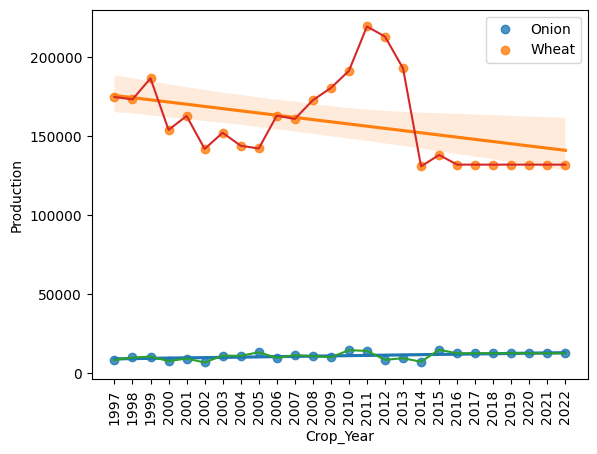

In [14]:
# After Prediction
full = pd.concat([onion_data, wheat_data, wheat_n_onion_df]) # Entire data collection
onion_full = full[full['Crop'] == 'Onion'] # Find the data rows containing 'Onion' in 'Crop' column
wheat_full = full[full['Crop'] == 'Wheat'] # Find the data rows containing 'Wheat' in 'Crop' column
onion_prod_full = onion_full.groupby("Crop_Year").mean()['Production'] # Mean Onion Production per year
wheat_prod_full = wheat_full.groupby("Crop_Year").mean()['Production'] # Mean Wheat Production per year

years_onion_prod_full = onion_prod_full.index # 'Years' index for Onion
years_onion_prod_full = pd.Series(years_onion_prod_full) # Make the 'Years' into a 1D date series label
years_wheat_prod_full = wheat_prod_full.index # 'Years' index for Wheat
years_wheat_prod_full = pd.Series(years_wheat_prod_full) # Make the 'Years' into a 1D date series label

onion_prod_df_full = pd.DataFrame(data=onion_prod_full,index=years_onion_prod_full) # Onion Production Dataframe (Years, Production)
wheat_prod_df_full = pd.DataFrame(data=wheat_prod_full,index=years_wheat_prod_full) # Wheat Production Dataframe (Years, Production)

sns.regplot(data=onion_prod_df_full,x=onion_prod_df_full.index,y=onion_prod_df_full.Production, label='Onion'); # Blue Color Onion Regression + Scatter Plot
sns.regplot(data=wheat_prod_df_full,x=wheat_prod_df_full.index,y=wheat_prod_df_full.Production, label='Wheat'); # Orange Color Wheat Regression + Scatter Plot

sns.lineplot(data=onion_prod_df_full,x=onion_prod_df_full.index,y=onion_prod_df_full.Production); # Blue Color Onion Line Plot
sns.lineplot(data=wheat_prod_df_full,x=wheat_prod_df_full.index,y=wheat_prod_df_full.Production); # Orange Color Wheat Line Plot

plt.gca().set_xticks(onion_prod_df_full.index); # Use original 'Years' from the onion production dataframe
# plt.gca().set_xticks(wheat_prod_df.index); # Use original data 'Years' from the wheat production dataframe

plt.xticks(rotation=90); # Rotate the X label by 90 degrees

In [15]:
only_wheat = wheat_n_onion_df[wheat_n_onion_df['Crop'] == 'Wheat'] # Only wheat data from the combined dataframe
only_onion = wheat_n_onion_df[wheat_n_onion_df['Crop'] == 'Onion'] # Only onion data from the combined dataframe
only_wheat_state_wise = only_wheat.groupby(['State_Name','Crop_Year']).mean()['Production'] # State-wise mean of Wheat Production
only_onion_state_wise = only_onion.groupby(['State_Name','Crop_Year']).mean()['Production'] # State-wise mean of Onion Production

In [16]:
################################## For Onion ##################################
onion_state_production_yearwise = {}
# Double Index, State Name + Year, in only onion state wise
#0th index selected (State Name), add that state name in dictionary and assigining it as an empty array/null array
#1st loop

for i in only_onion_state_wise.index:
    onion_state_production_yearwise[i[0]] = [] # Put the name of the states in the dictionary
    

# If condition is checking if the state name is in dictionary
# Adding years to the state in dictionary and then locating the production from only_onion_state_wise
# according to i[0] (which is State Name) and i[1] (which is Year)
for i in only_onion_state_wise.index:
    if i[0] in onion_state_production_yearwise:
        onion_state_production_yearwise[i[0]].append({i[1] : only_onion_state_wise.loc[(i[0], i[1])]})

Andhra Pradesh
Mean :  20225.666535132466
Median :  17725.968481810523
Variance :  75278434.01948862
Standard Deviation :  8676.314541295089
Average Deviation / Mean Absolute Deviation :  5415.8143696518855

Assam
Mean :  2463.5977270441012
Median :  788.7826086956522
Variance :  6513474.703769944
Standard Deviation :  2552.1509954879125
Average Deviation / Mean Absolute Deviation :  2348.9044212682975

Bihar
Mean :  5503.598929075077
Median :  4434.189189189189
Variance :  4860227.317104332
Standard Deviation :  2204.592324468252
Average Deviation / Mean Absolute Deviation :  1991.3821054957618

Chandigarh
Mean :  524.3593709050883
Median :  225.0
Variance :  262471.6991544926
Standard Deviation :  512.31991875633
Average Deviation / Mean Absolute Deviation :  469.77826873963323

Chhattisgarh
Mean :  1989.73368452617
Median :  1865.304347826087
Variance :  403335.9416498014
Standard Deviation :  635.0873496219251
Average Deviation / Mean Absolute Deviation :  517.0862827714836

Gujara

C:\Users\Melwin\AppData\Local\Temp\ipykernel_4492\3998103797.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


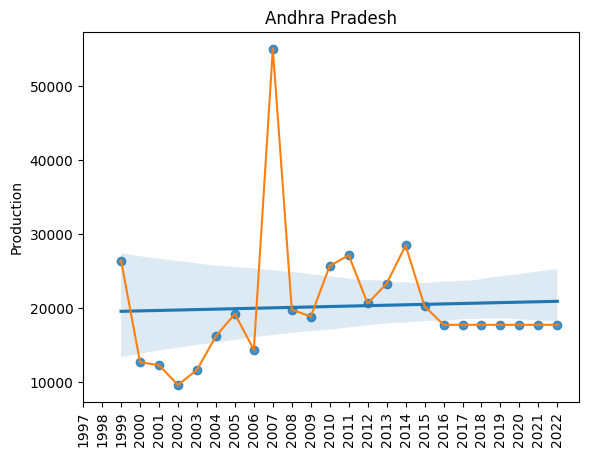

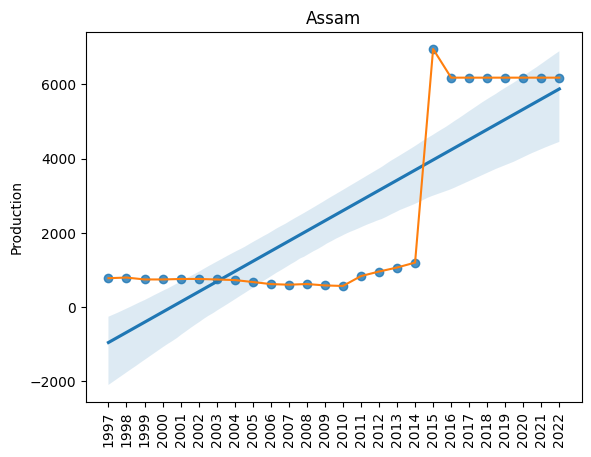

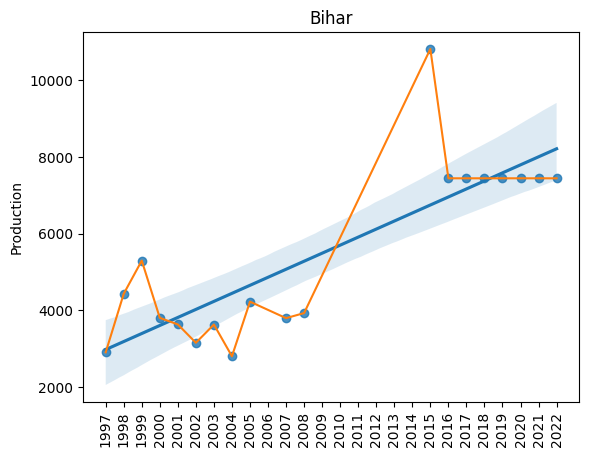

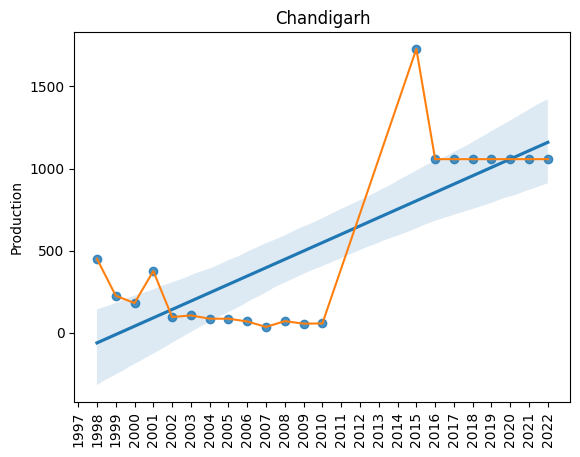

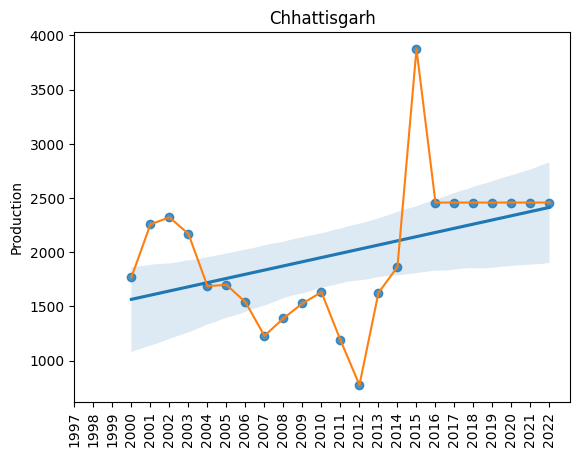

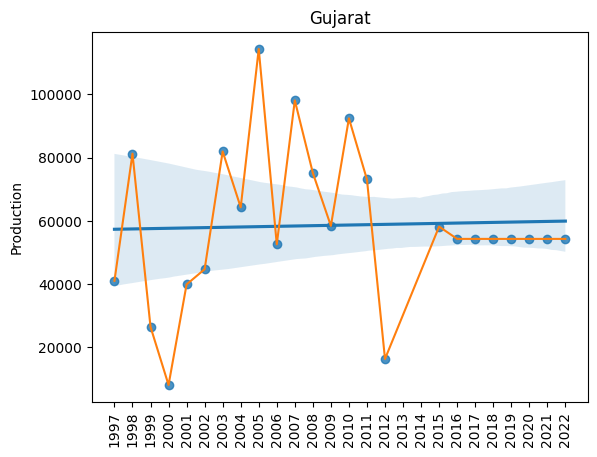

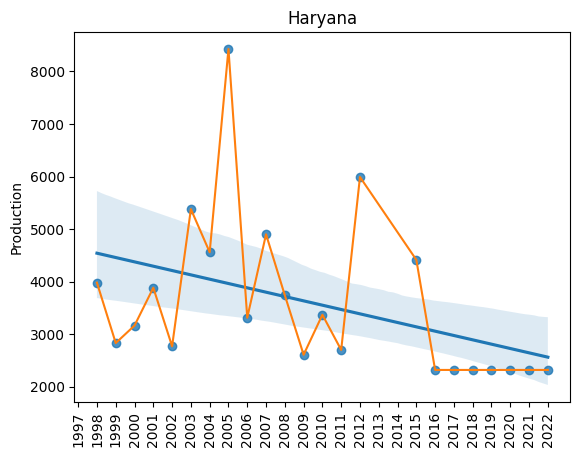

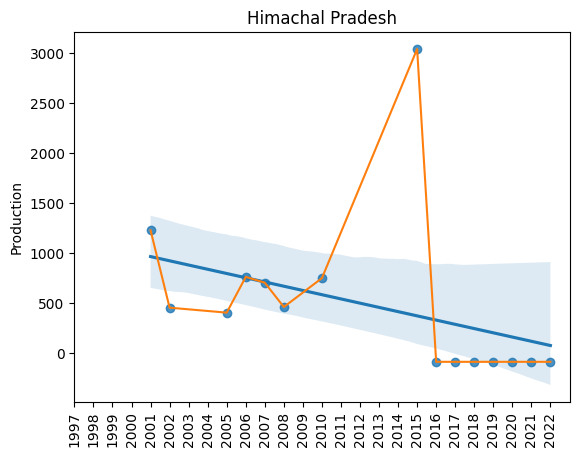

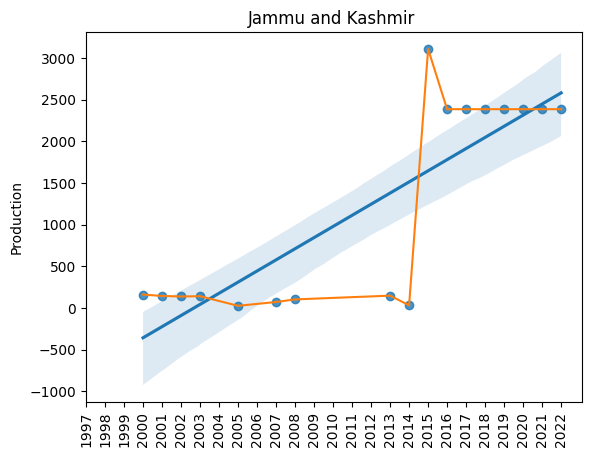

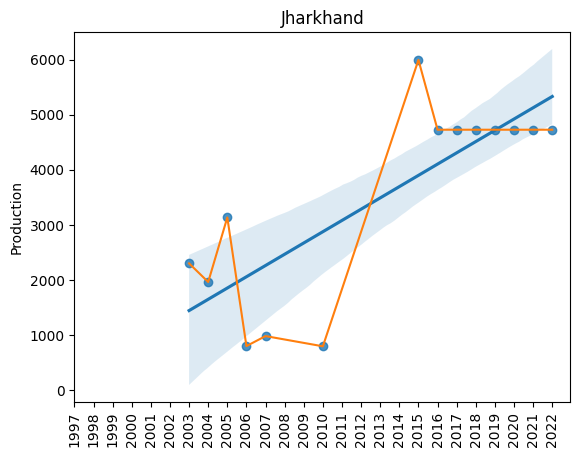

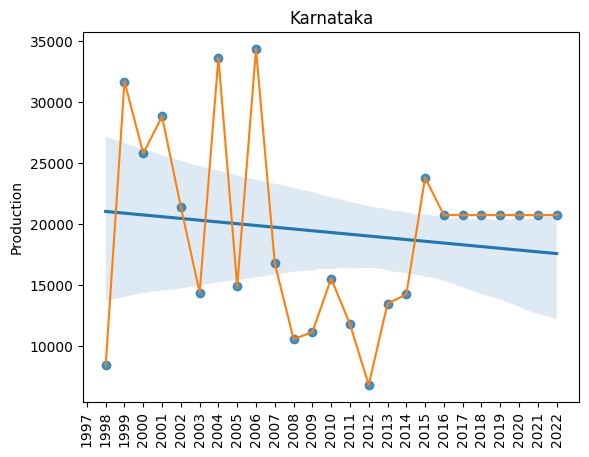

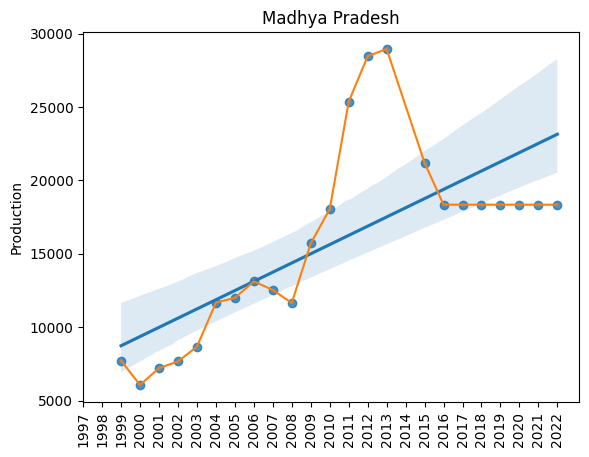

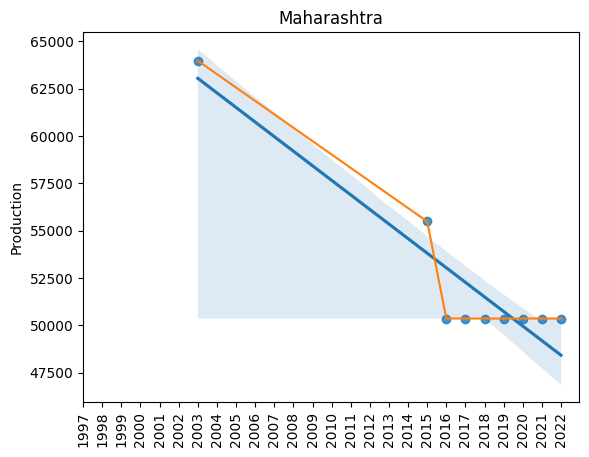

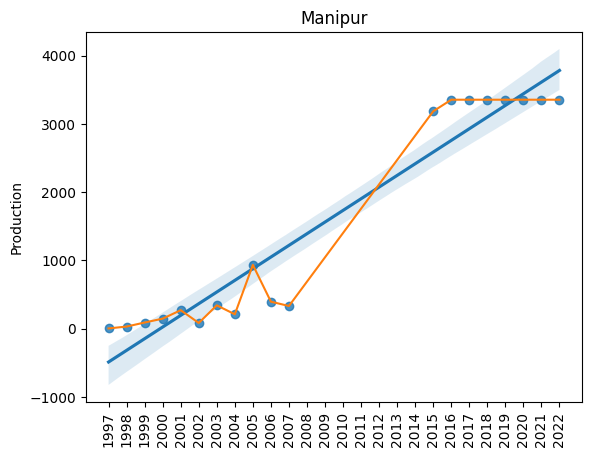

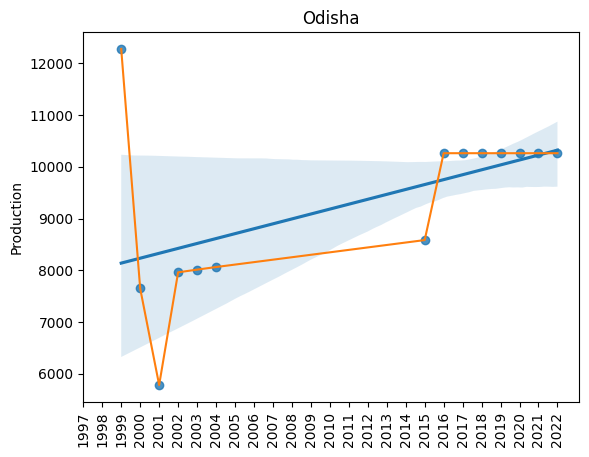

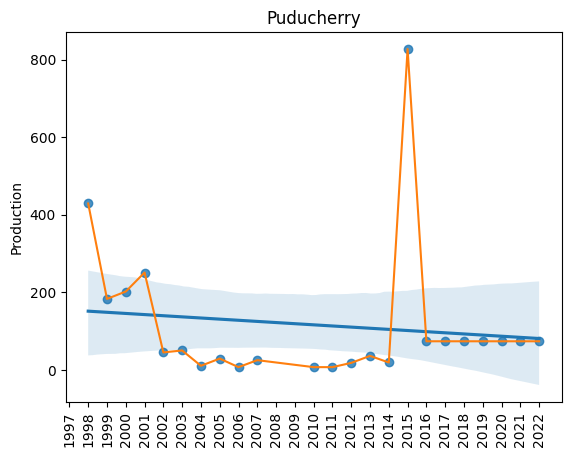

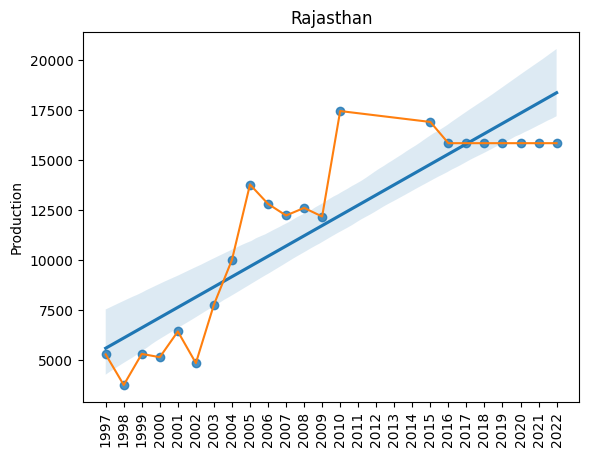

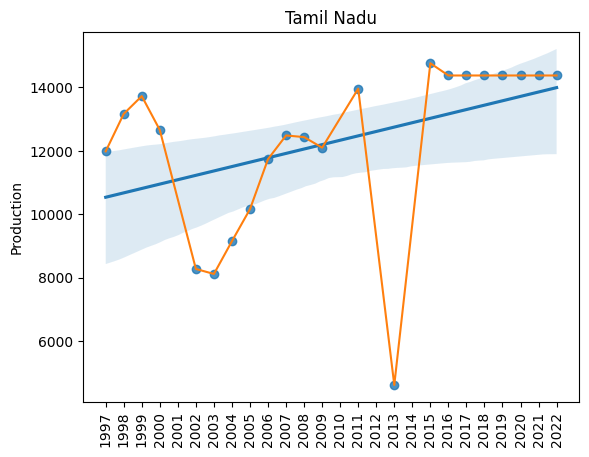

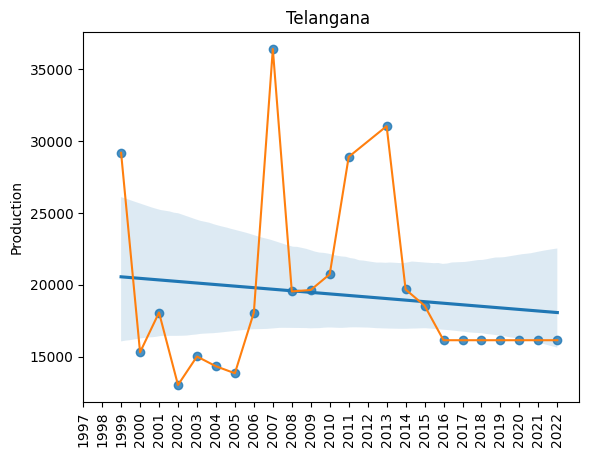

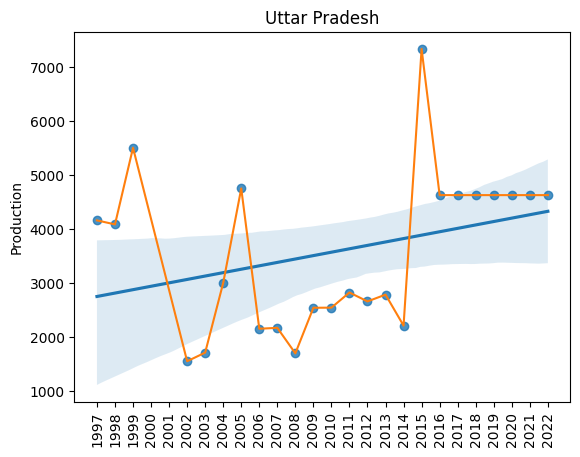

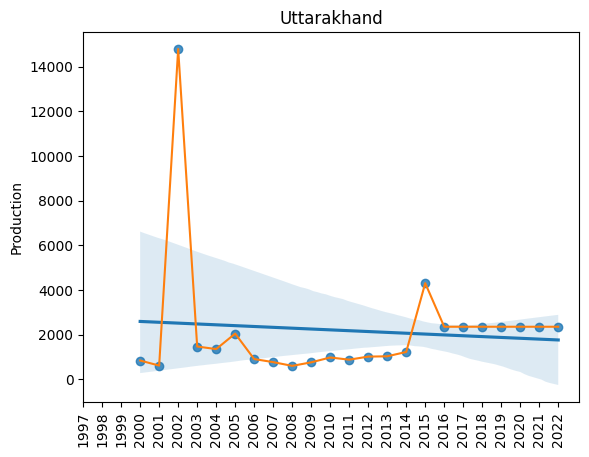

In [17]:
# Iterating over state names in dictionary 
# Second for loop, going to state and iterating over each year
# Third for loop, appending production to data variable and the year to the year_keys variable which will be used for
# plotting
# Always intialized as empty again on a new iteration
# Plotting is also done in the loop
for i in onion_state_production_yearwise:
    data = []
    year_keys = []
    for year in onion_state_production_yearwise[i]:
        
        for y in year.keys():
            data.append(year[y])
            year_keys.append(y)
            
    onion_statewise_plot = pd.DataFrame(data=data,index=year_keys)
    plt.figure()
    temp = sns.regplot(data=onion_statewise_plot,x=onion_statewise_plot.index,y=onion_statewise_plot[0])
    sns.lineplot(data=onion_statewise_plot,x=onion_statewise_plot.index,y=onion_statewise_plot[0])
    plt.gca().set_xticks(onion_prod_df_full.index);
    plt.xticks(rotation=90);
    plt.title(i)
    temp.set_ylabel('Production')
    
    print(i)
    print("Mean : ", onion_statewise_plot[0].mean())
    print("Median : ", onion_statewise_plot[0].median())
    print("Variance : ", onion_statewise_plot[0].var(ddof=0)) 
    print("Standard Deviation : ", onion_statewise_plot[0].std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", onion_statewise_plot[0].mad())
    print("")


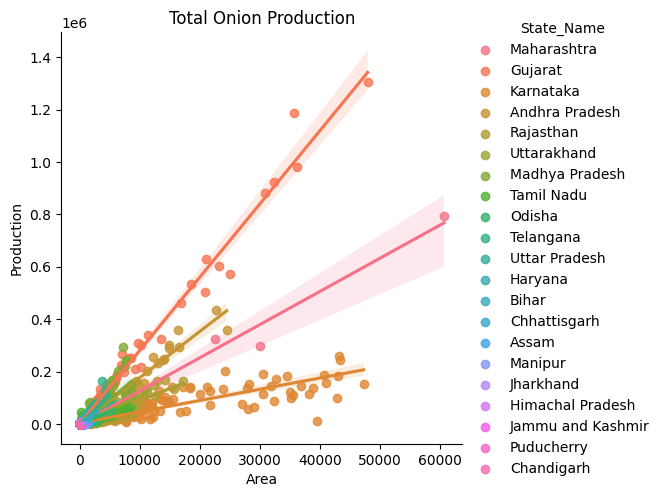

In [18]:
sns.lmplot(data=onion_data, x='Area', y='Production', hue='State_Name'); # Reg+FacetGrid = lmplot, plotting all over India onion production x area
plt.title("Total Onion Production");

C:\Users\Melwin\AppData\Local\Temp\ipykernel_4492\2032861461.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


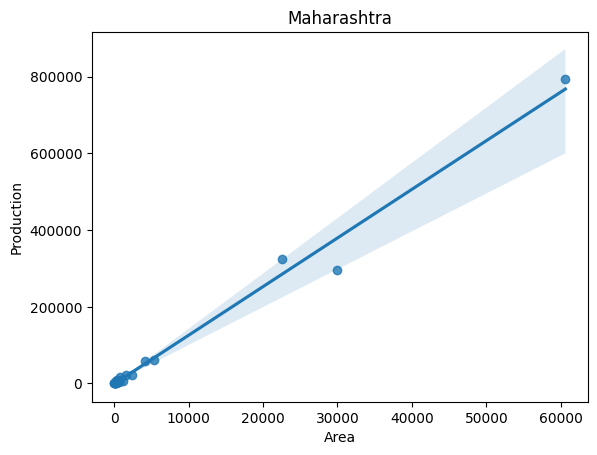

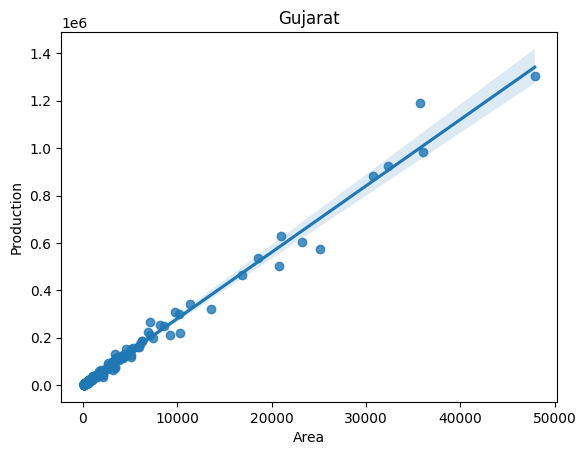

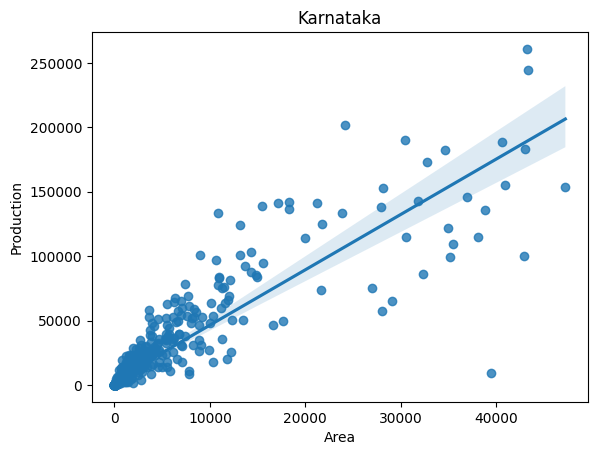

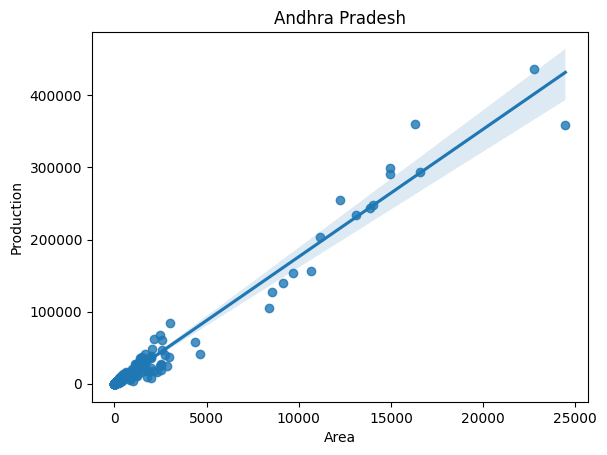

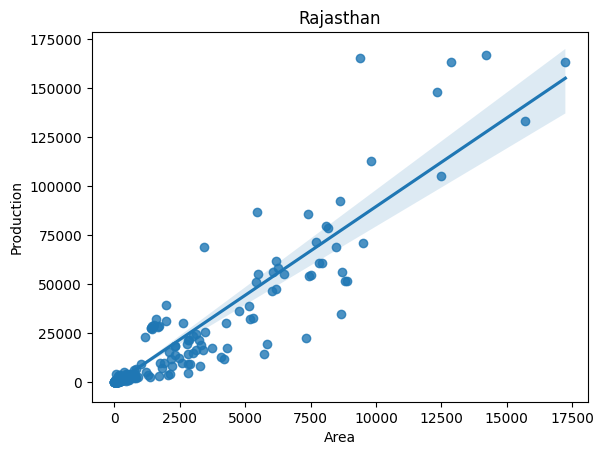

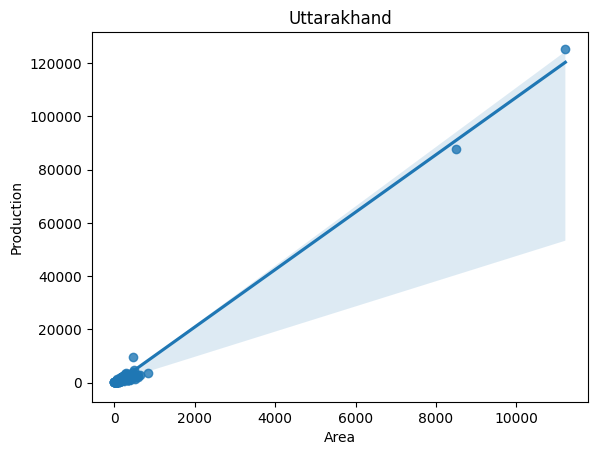

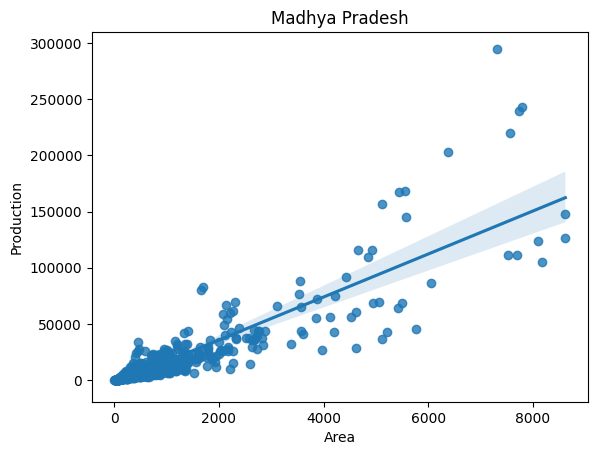

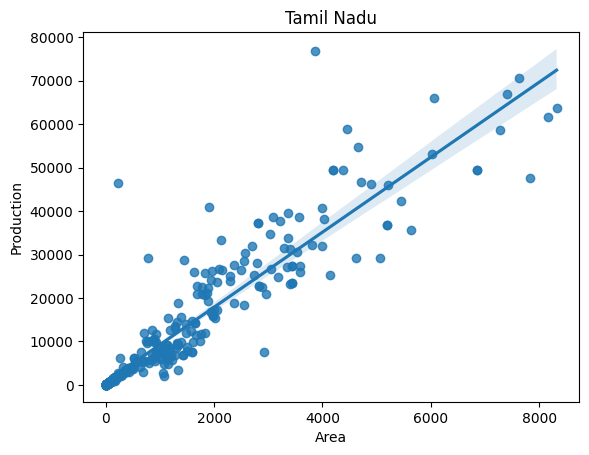

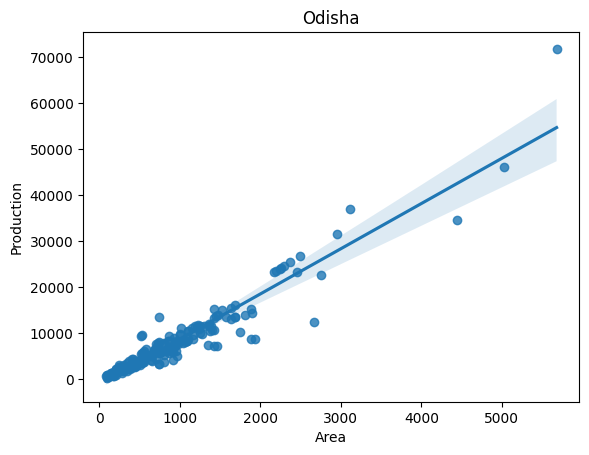

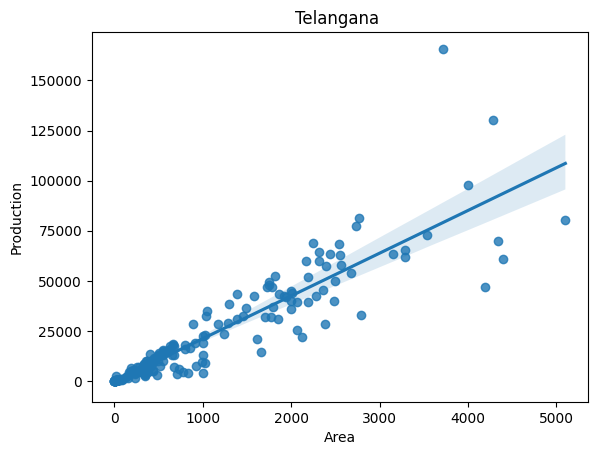

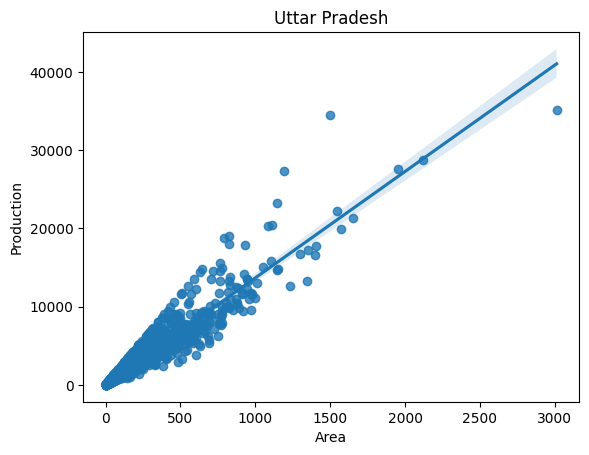

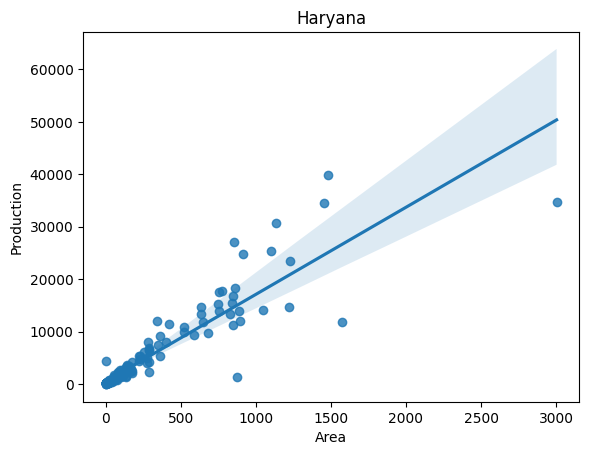

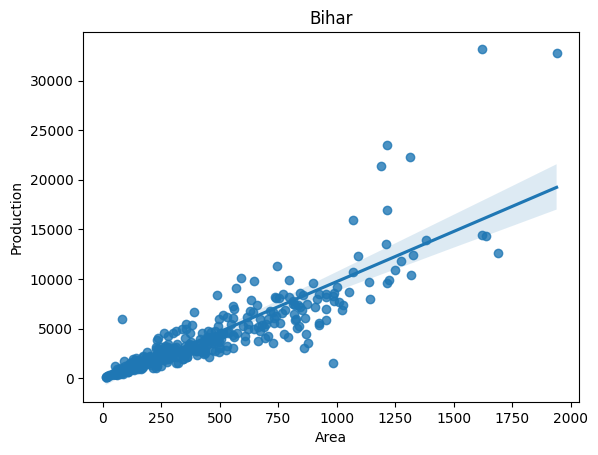

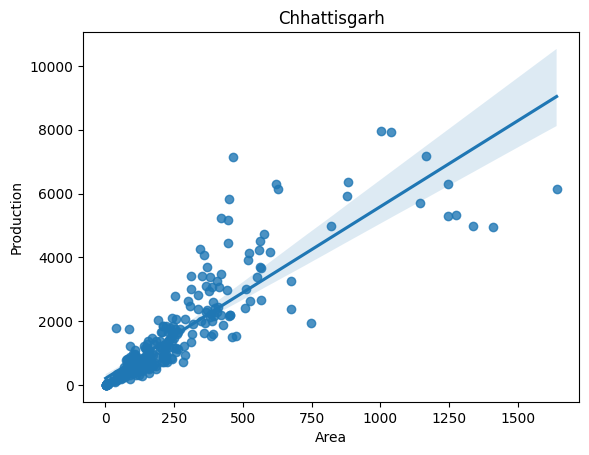

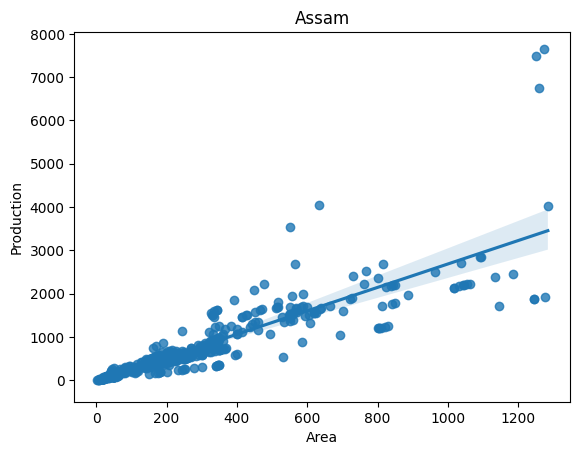

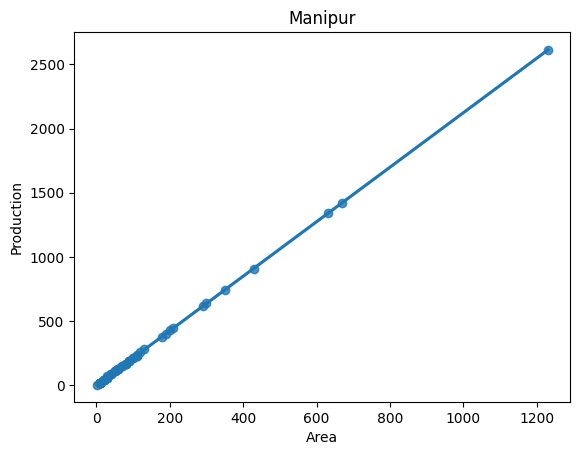

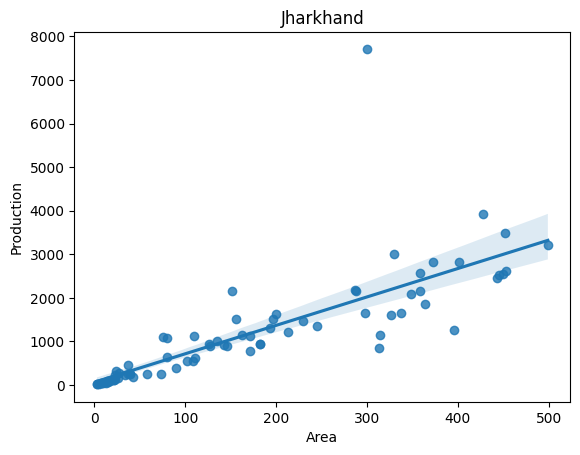

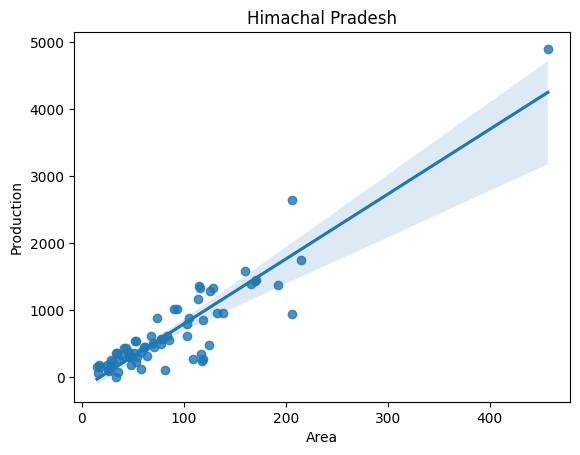

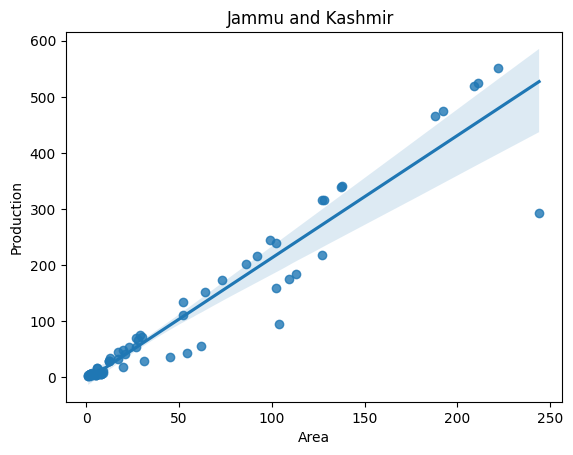

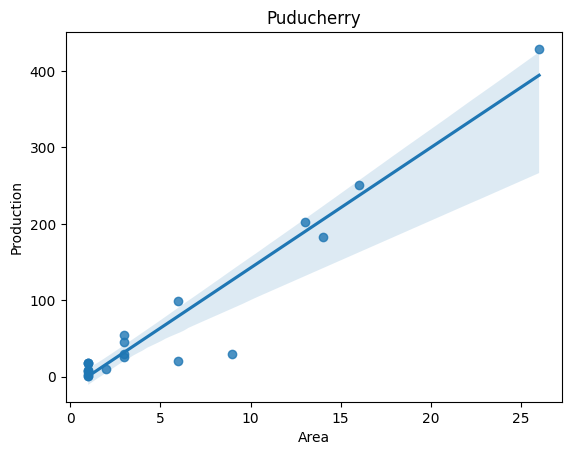

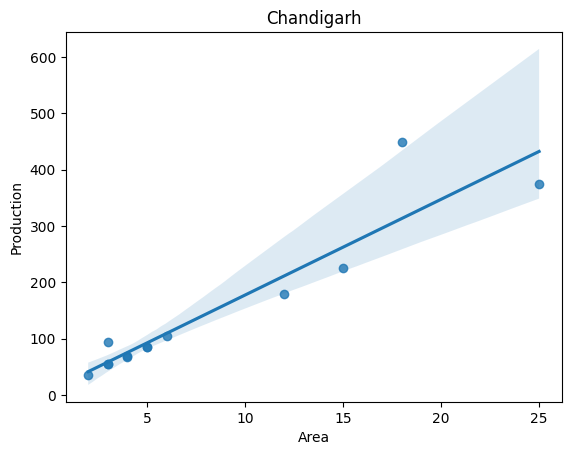

In [19]:
for state in onion_data.State_Name.unique(): # Function for plotting Area x Production state-wise for Onion
    data=onion_data[onion_data.State_Name == state]
    plt.figure()
    plt.title(state)
    sns.regplot(data=data, x='Area', y='Production', label='Onion');

In [20]:
################################## For Wheat ##################################

wheat_state_production_yearwise = {}
# Double Index, State Name + Year, in only onion state wise
#0th index selected (State Name), add that state name in dictionary and assigining it as an empty array/null array
#1st loop

for i in only_wheat_state_wise.index:
    wheat_state_production_yearwise[i[0]] = [] # Put the name of the states in the dictionary
    

# If condition is checking if the state name is in dictionary
# Adding years to the state in dictionary and then locating the production from only_onion_state_wise
# according to i[0] (which is State Name) and i[1] (which is Year)
for i in only_wheat_state_wise.index:
    if i[0] in wheat_state_production_yearwise:
        wheat_state_production_yearwise[i[0]].append({i[1] : only_wheat_state_wise.loc[(i[0], i[1])]})

Andhra Pradesh
Mean :  532.0649069135615
Median :  250.0
Variance :  520604.59839427576
Standard Deviation :  721.5293468697415
Average Deviation / Mean Absolute Deviation :  471.51627340244346

Arunachal Pradesh
Mean :  1113.9627022457867
Median :  515.2628205128206
Variance :  926799.7038466989
Standard Deviation :  962.7043699115003
Average Deviation / Mean Absolute Deviation :  836.0607291988462

Assam
Mean :  4266.869396644174
Median :  3625.98418972332
Variance :  5326846.642915381
Standard Deviation :  2307.9962397966297
Average Deviation / Mean Absolute Deviation :  2044.3657455292846

Bihar
Mean :  113135.47768624568
Median :  110061.81228614564
Variance :  540780806.8641096
Standard Deviation :  23254.6942973695
Average Deviation / Mean Absolute Deviation :  17675.663262092392

Chandigarh
Mean :  2418.0174186587924
Median :  2700.0
Variance :  743902.4038596225
Standard Deviation :  862.4977703505224
Average Deviation / Mean Absolute Deviation :  766.5515215328091

Chhattisga

C:\Users\Melwin\AppData\Local\Temp\ipykernel_4492\455754960.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Rajasthan
Mean :  193431.01770063528
Median :  180815.0625
Variance :  1374347841.0922701
Standard Deviation :  37072.19768360476
Average Deviation / Mean Absolute Deviation :  29329.081161601436

Sikkim
Mean :  1559.641219619776
Median :  1539.0086115818235
Variance :  668848.7444466072
Standard Deviation :  817.8317335776395
Average Deviation / Mean Absolute Deviation :  619.2579743912432

Tamil Nadu
Mean :  557.2527535797389
Median :  625.5206817839008
Variance :  346814.0032580075
Standard Deviation :  588.9091638427844
Average Deviation / Mean Absolute Deviation :  364.94628016427026

Telangana 
Mean :  2623.1097293401913
Median :  1726.0
Variance :  3780010.4246673984
Standard Deviation :  1944.2248904556793
Average Deviation / Mean Absolute Deviation :  1726.5168509502791

Tripura
Mean :  543.2200534296754
Median :  525.0
Variance :  161055.8817764201
Standard Deviation :  401.31768186365787
Average Deviation / Mean Absolute Deviation :  248.55885556686246

Uttar Pradesh
Mean : 

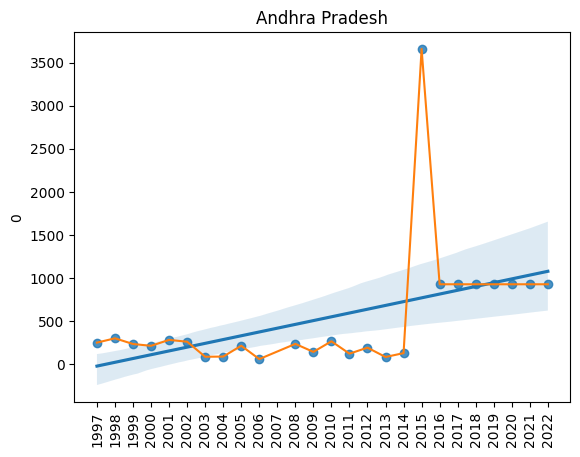

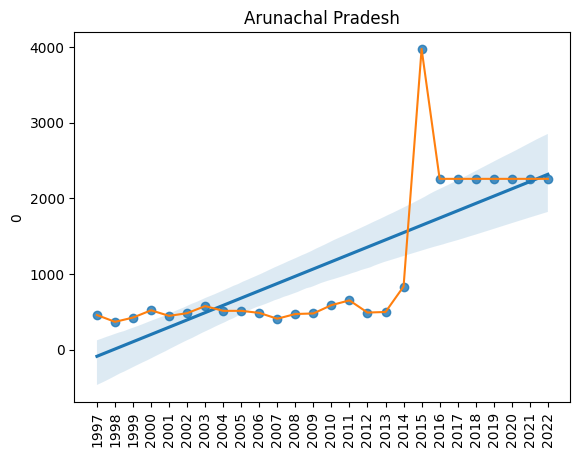

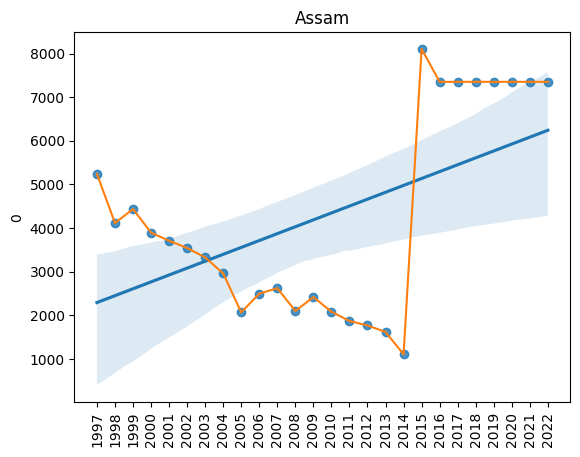

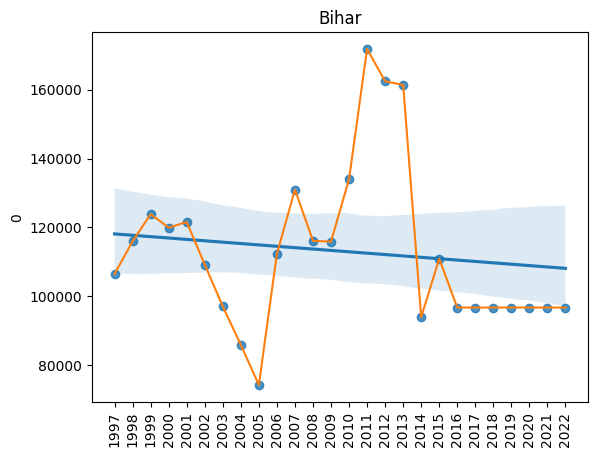

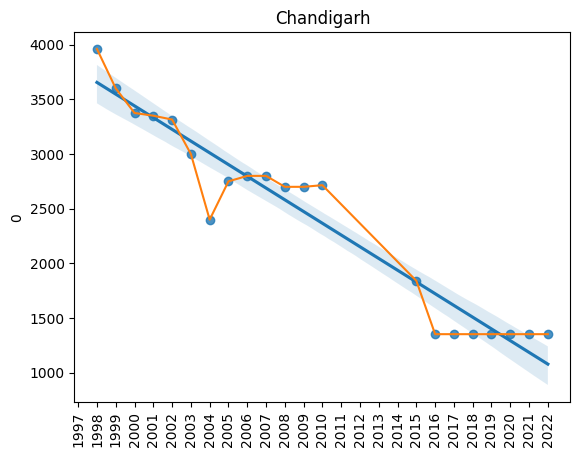

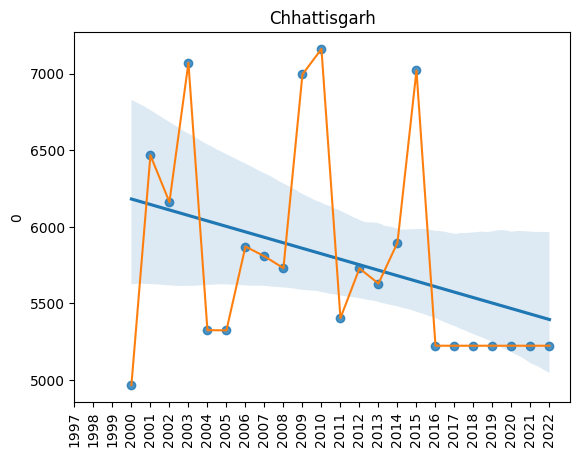

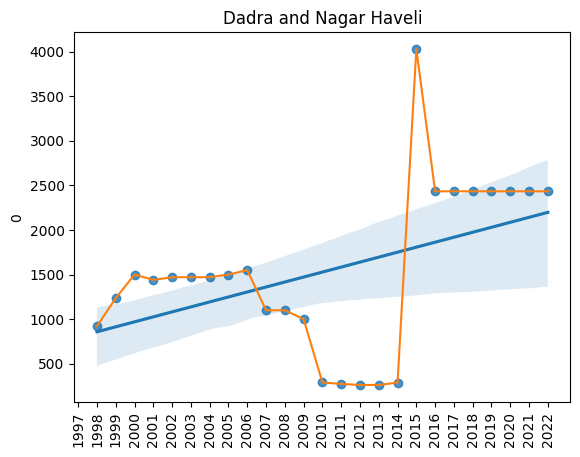

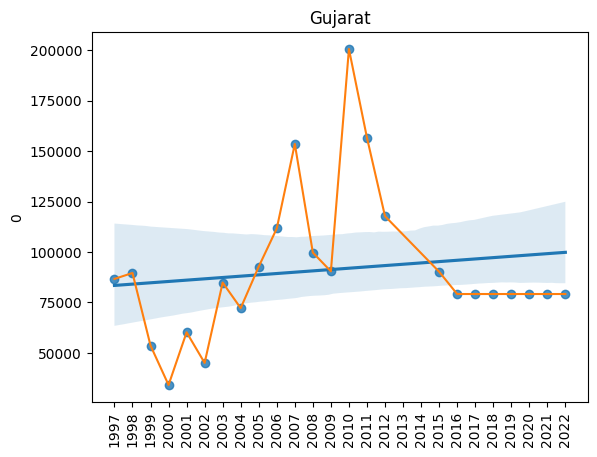

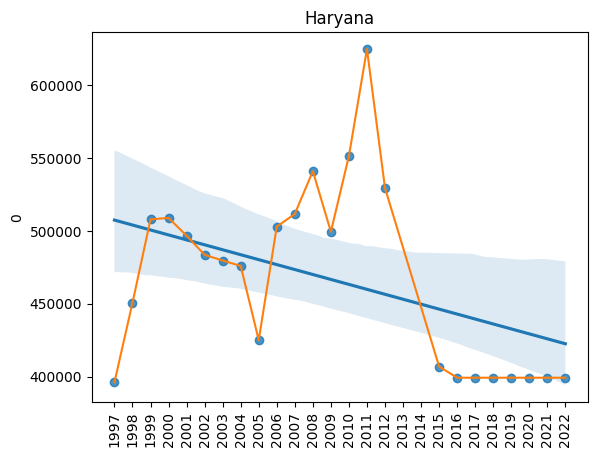

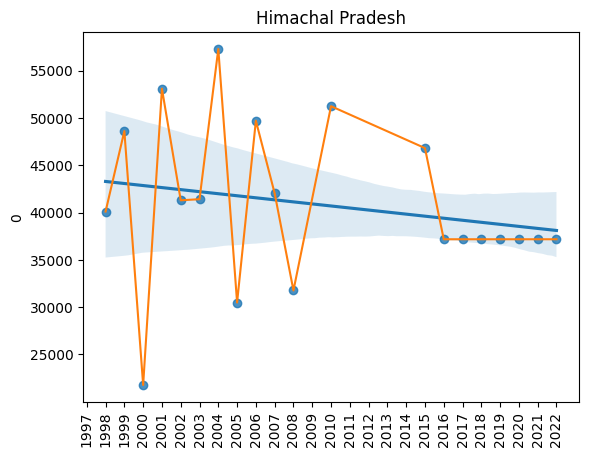

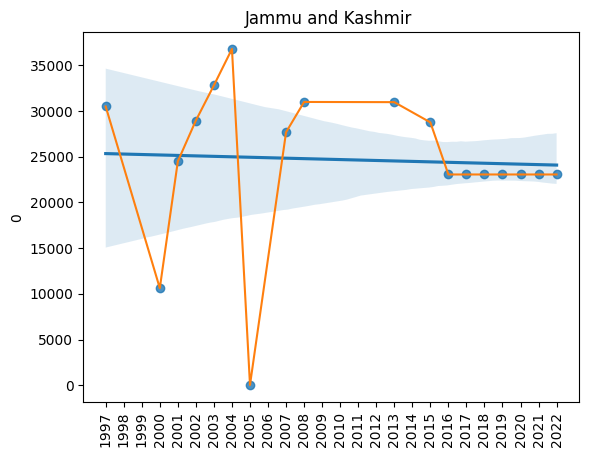

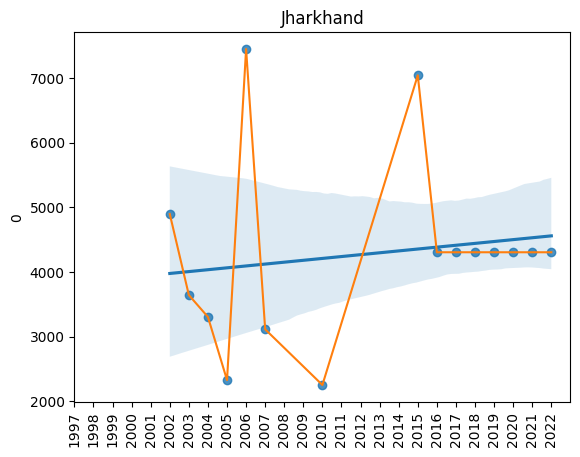

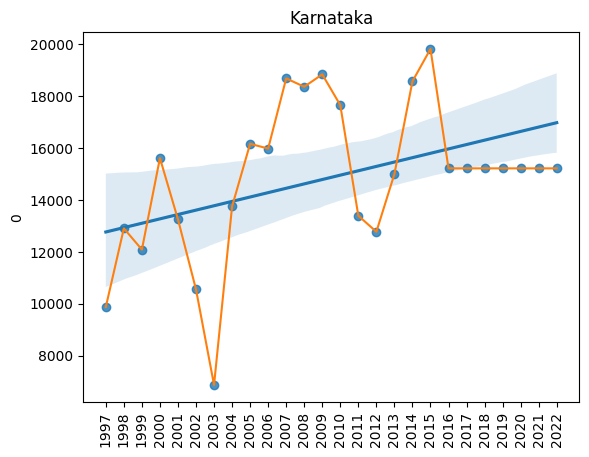

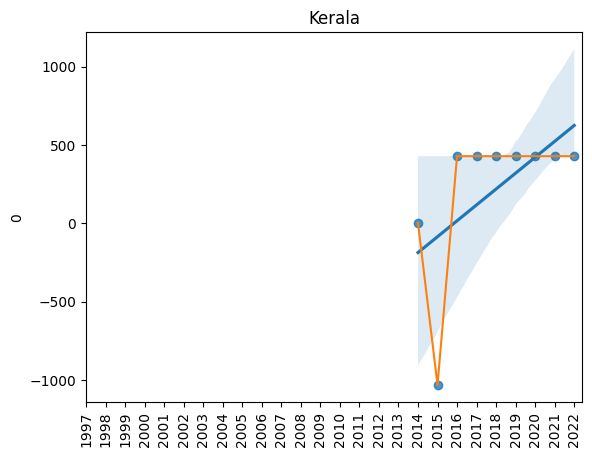

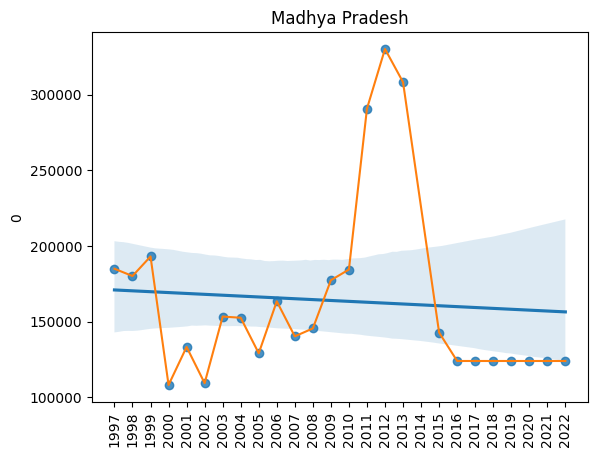

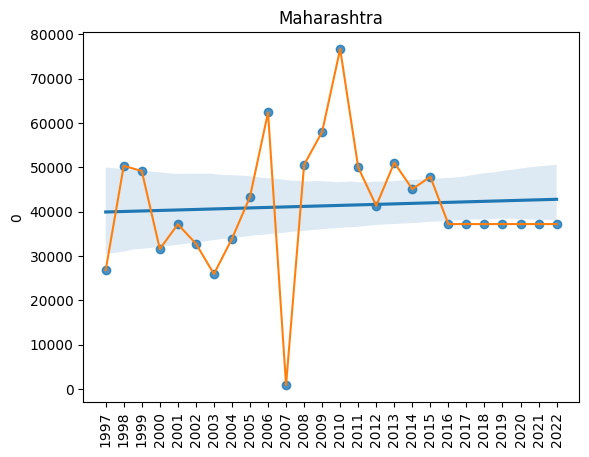

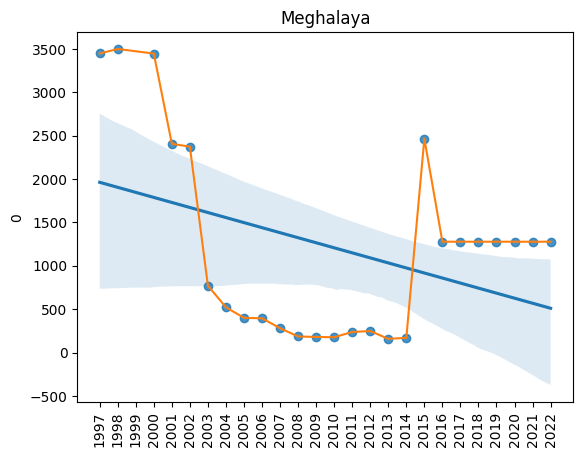

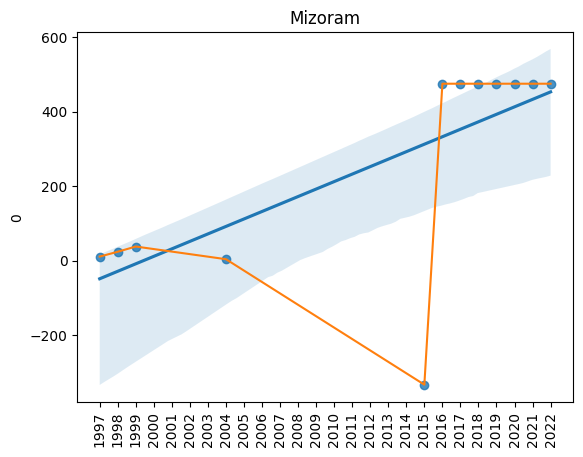

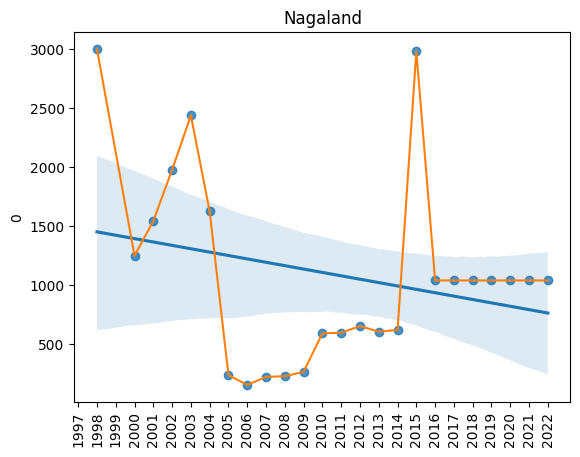

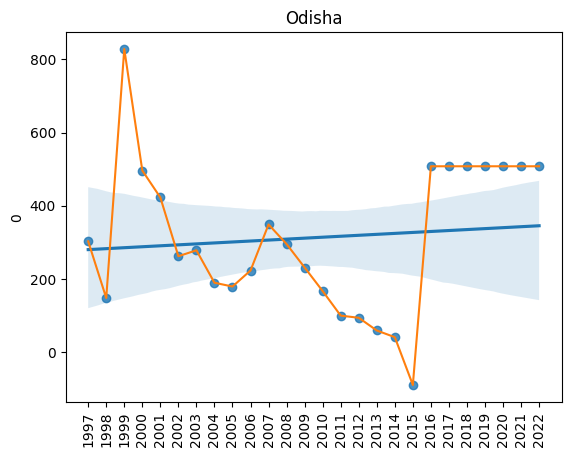

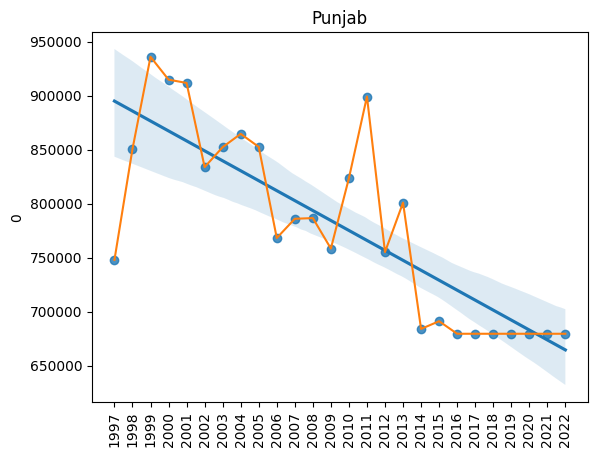

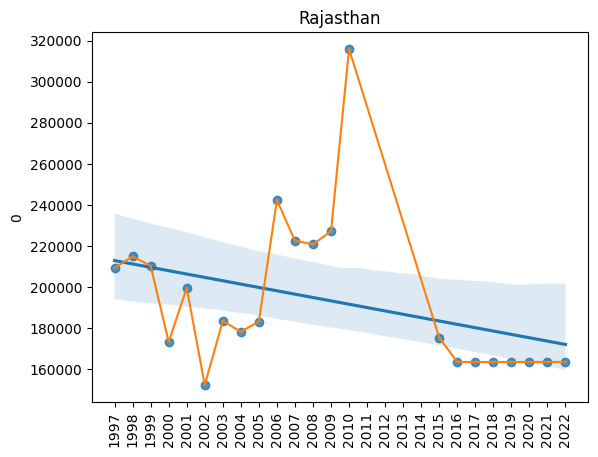

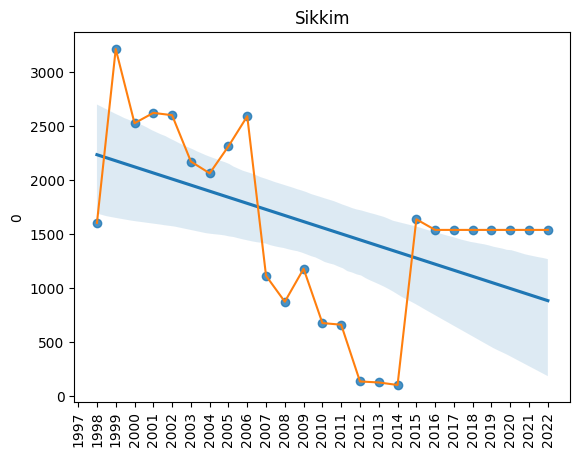

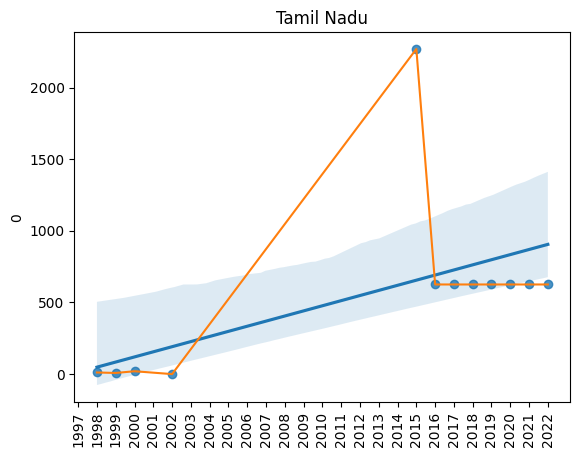

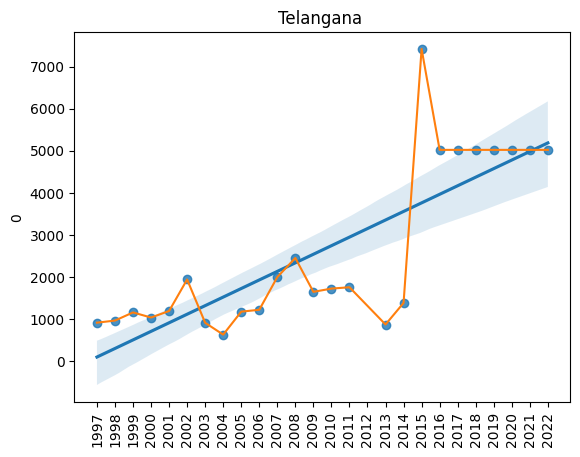

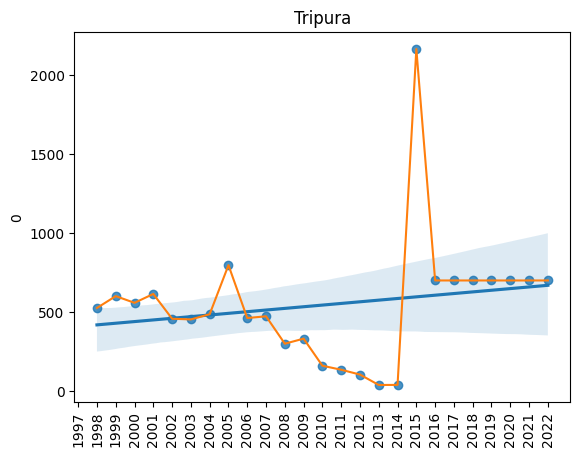

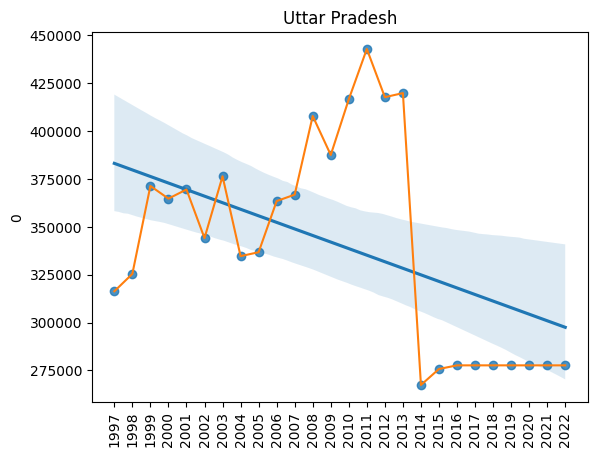

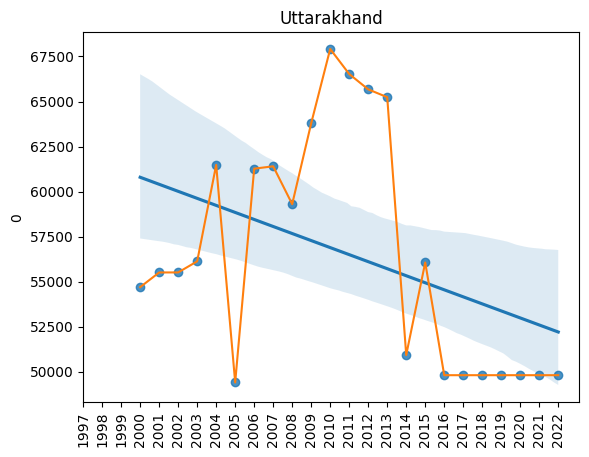

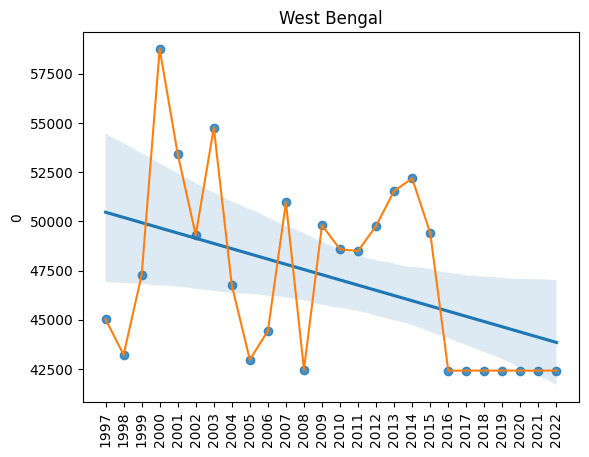

In [21]:
# Iterating over state names in dictionary 
# Second for loop, going to state and iterating over each year
# Third for loop, appending production to data variable and the year to the year_keys variable which will be used for
# plotting
# Always intialized as empty again on a new iteration
# Plotting is also done in the loop
for i in wheat_state_production_yearwise:
    data = []
    year_keys = []
    for year in wheat_state_production_yearwise[i]:
        
        for y in year.keys():
            data.append(year[y])
            year_keys.append(y)
            
    wheat_statewise_plot = pd.DataFrame(data=data,index=year_keys)
    plt.figure()
    sns.regplot(data=wheat_statewise_plot,x=wheat_statewise_plot.index,y=wheat_statewise_plot[0])
    sns.lineplot(data=wheat_statewise_plot,x=wheat_statewise_plot.index,y=wheat_statewise_plot[0])
    plt.gca().set_xticks(wheat_prod_df_full.index);
    plt.xticks(rotation=90);
    plt.title(i)
    
    print(i)
    print("Mean : ", wheat_statewise_plot[0].mean())
    print("Median : ", wheat_statewise_plot[0].median())
    print("Variance : ", wheat_statewise_plot[0].var(ddof=0)) 
    print("Standard Deviation : ", wheat_statewise_plot[0].std(ddof=0))
    print("Average Deviation / Mean Absolute Deviation : ", wheat_statewise_plot[0].mad())
    print("")


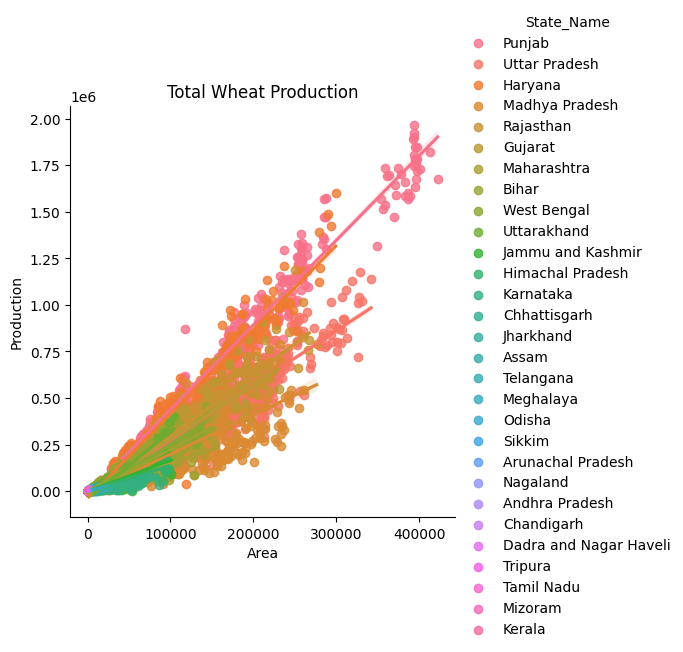

In [22]:
sns.lmplot(data=wheat_data, x='Area', y='Production', hue='State_Name'); # Reg+FacetGrid = lmplot, plotting all over India wheat production x area
plt.title("Total Wheat Production");

C:\Users\Melwin\AppData\Local\Temp\ipykernel_4492\1954298237.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


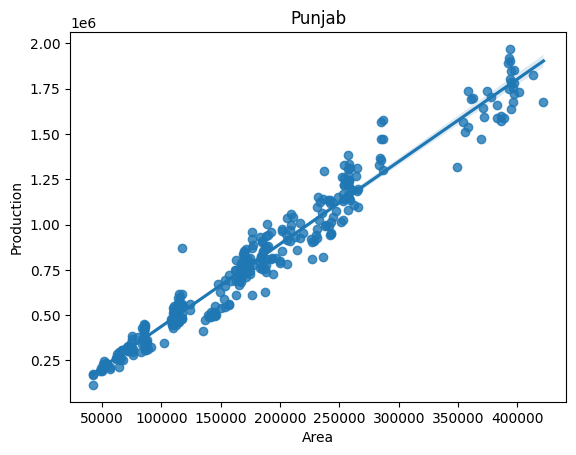

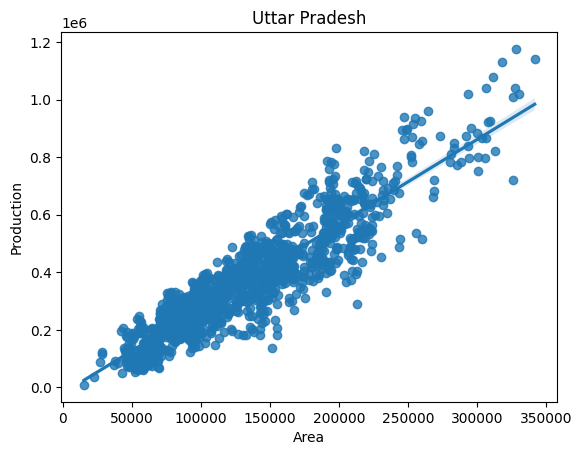

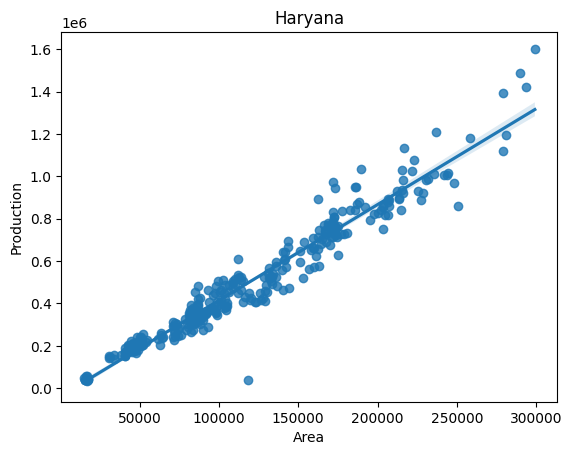

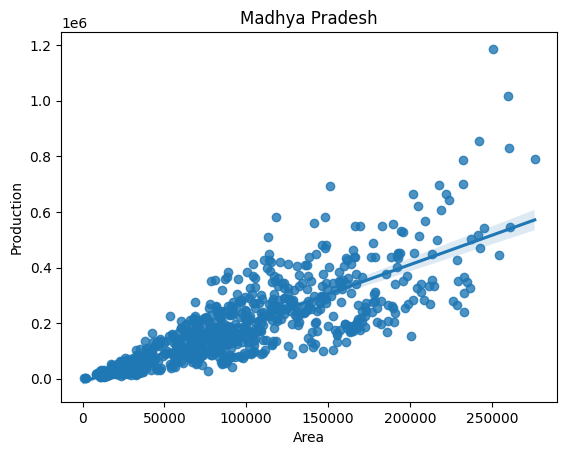

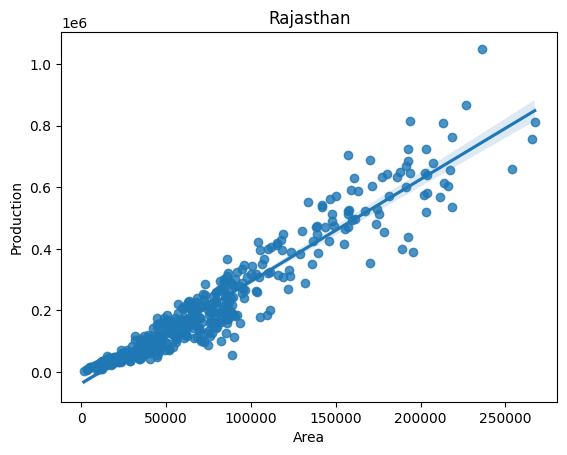

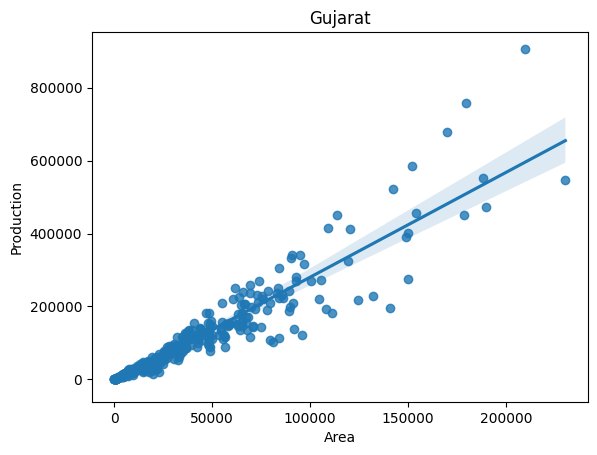

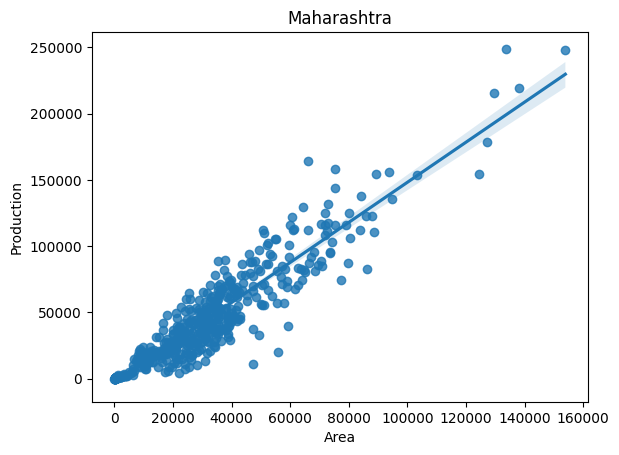

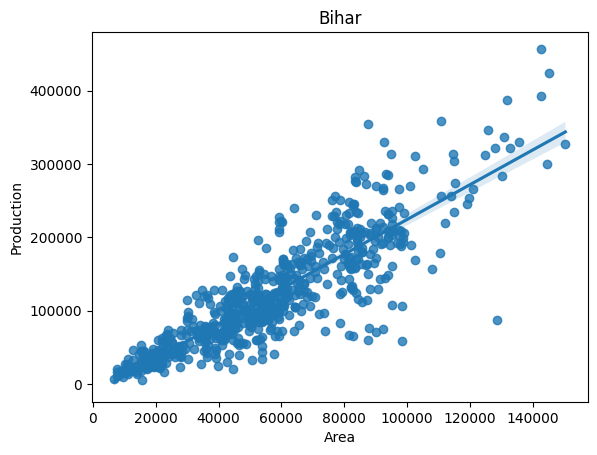

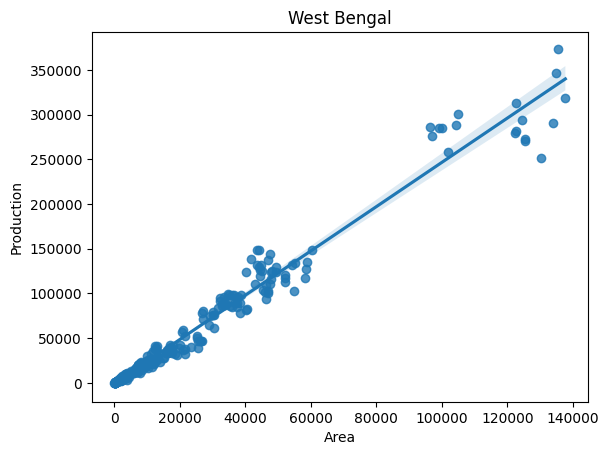

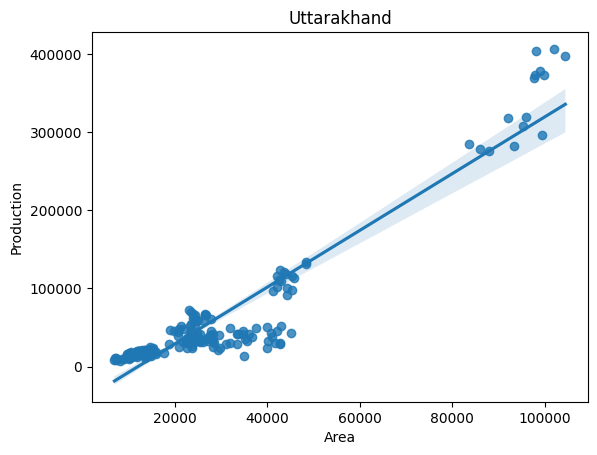

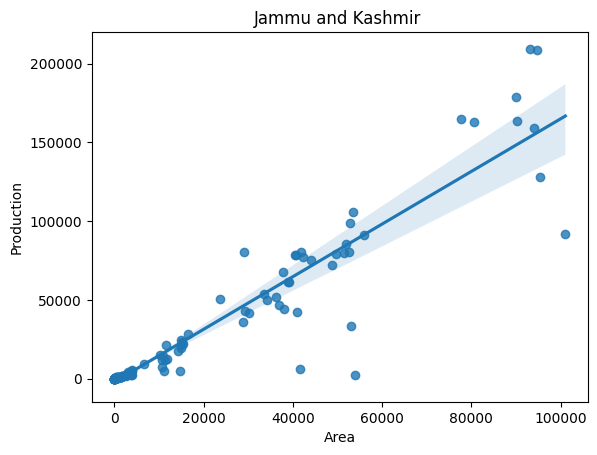

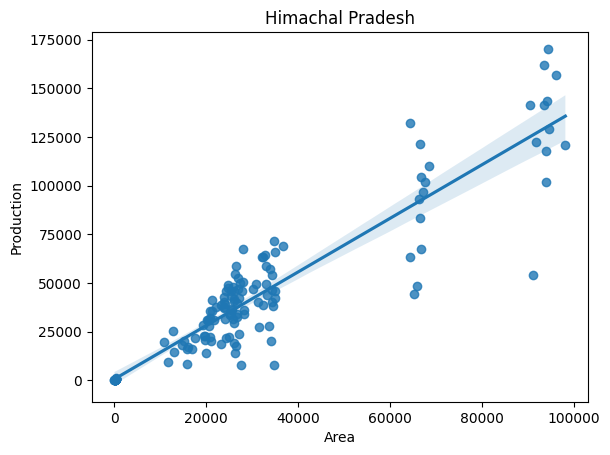

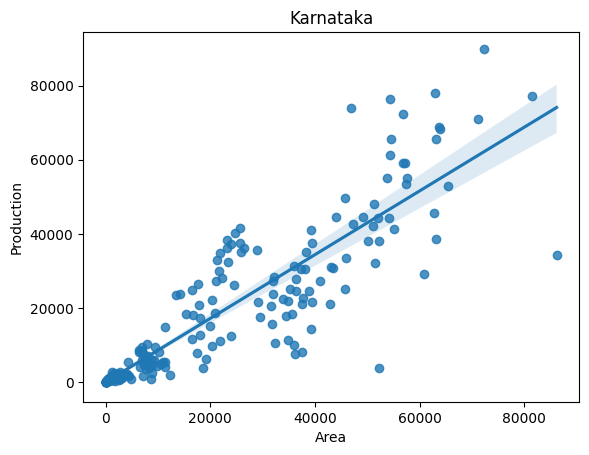

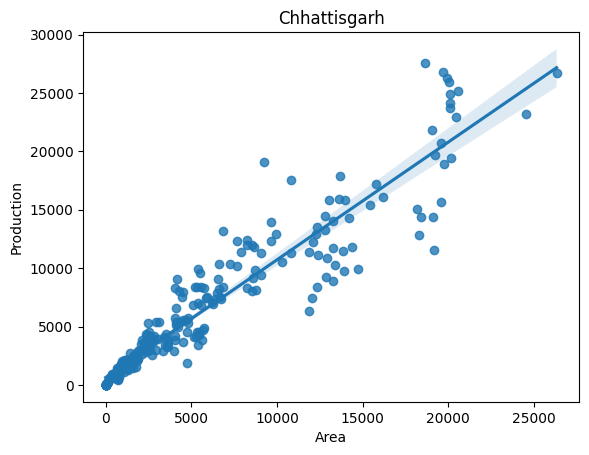

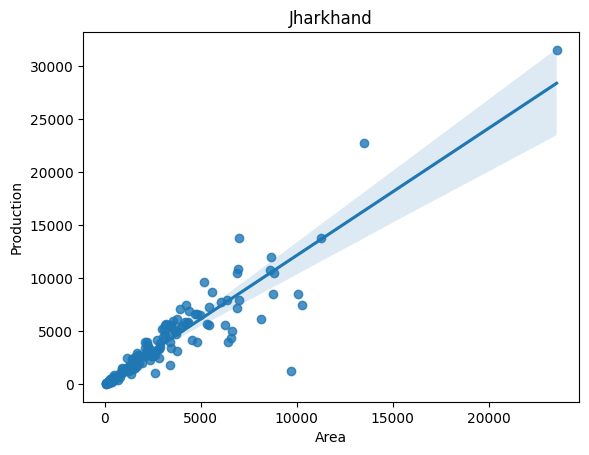

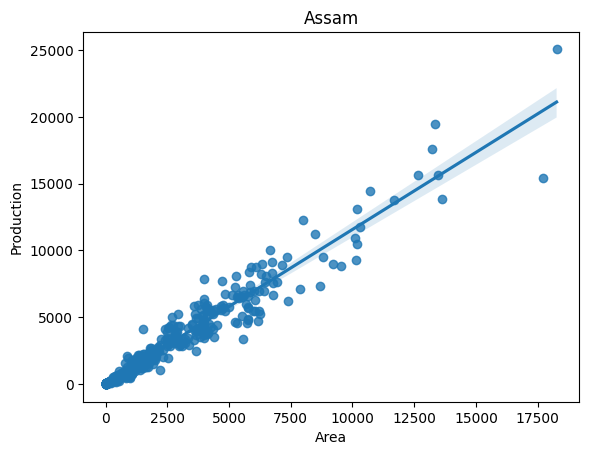

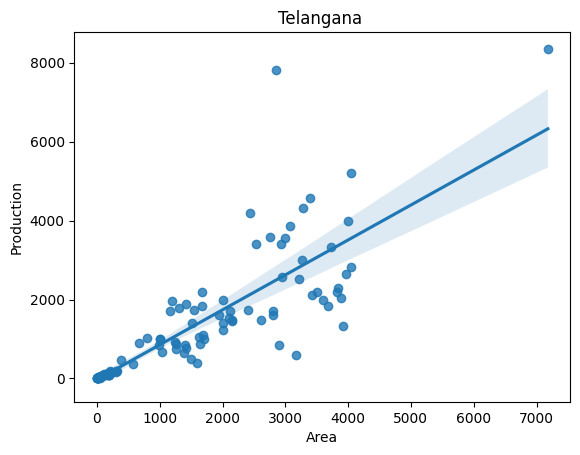

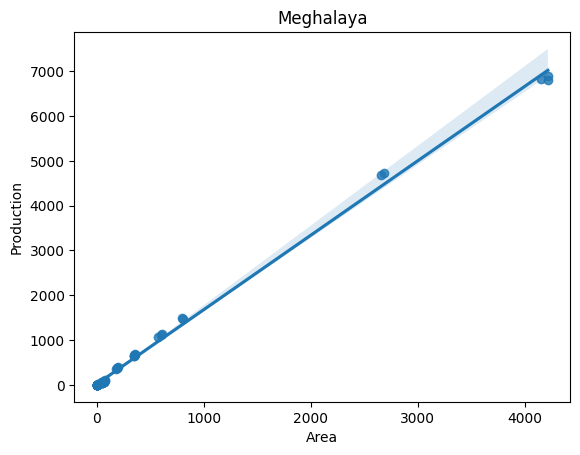

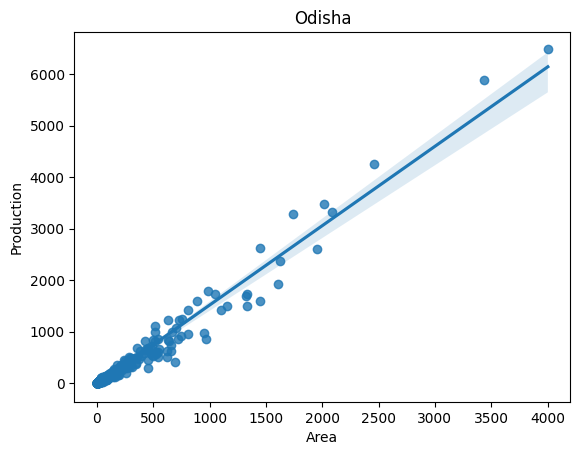

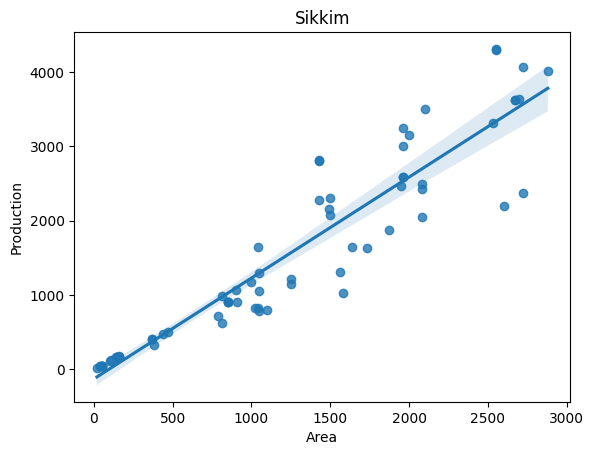

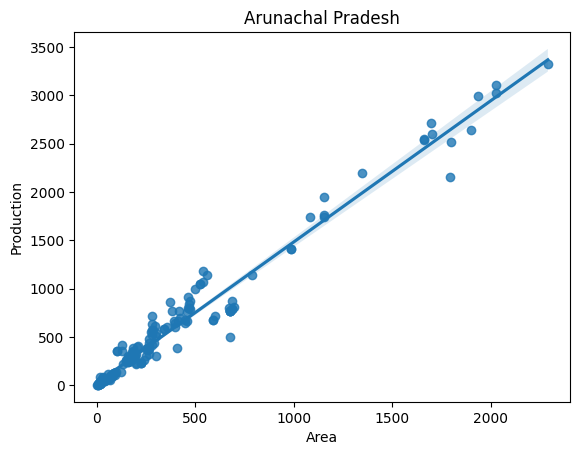

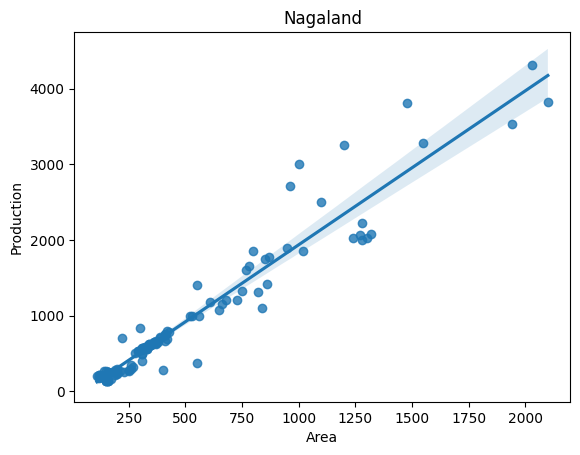

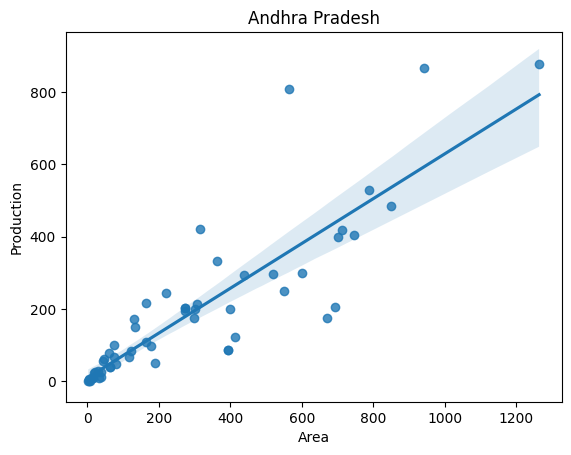

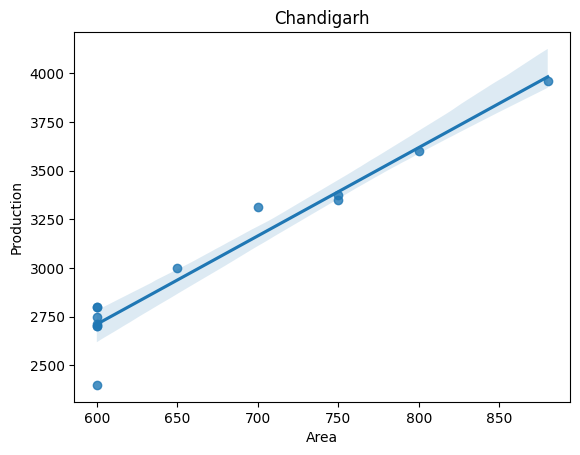

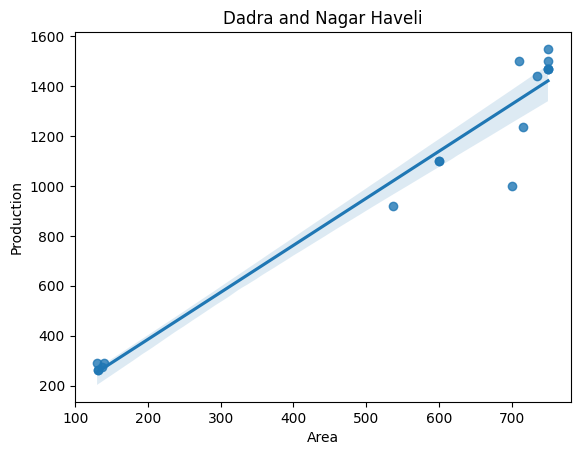

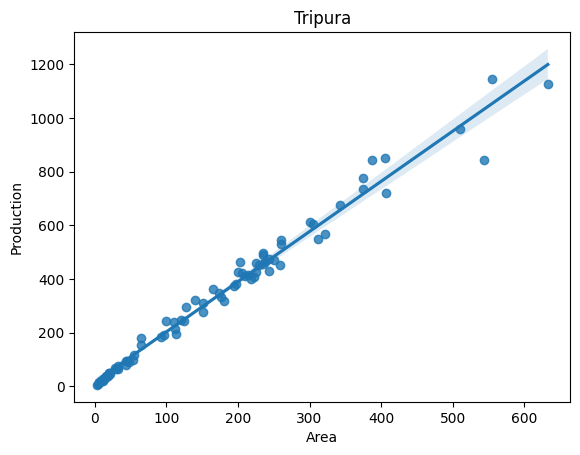

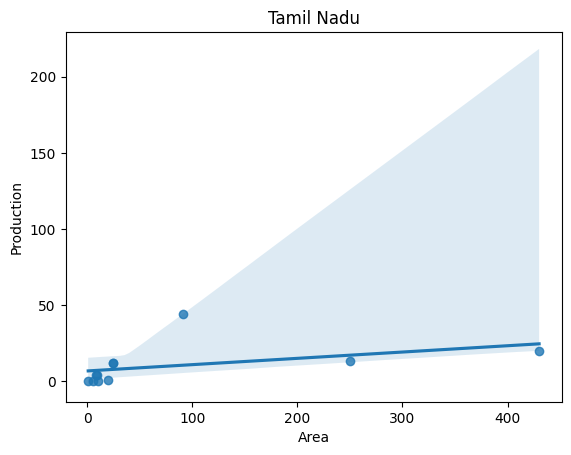

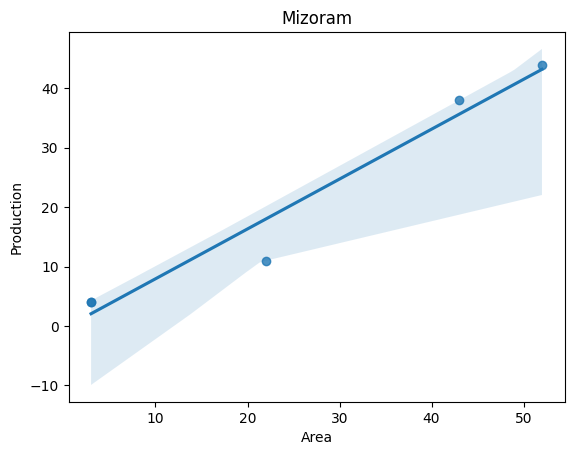

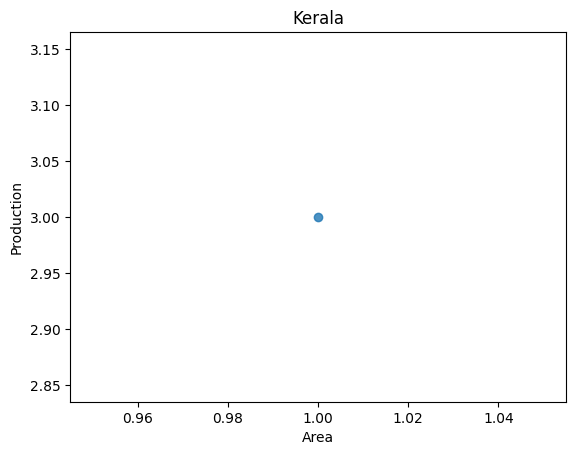

In [23]:
for state in wheat_data.State_Name.unique(): # Function for plotting Area x Production state-wise for Wheat
    data=wheat_data[wheat_data.State_Name == state]
    plt.figure()
    plt.title(state)
    sns.regplot(data=data, x='Area', y='Production', label='Wheat')